# EDA & Predict IT jobs salary in 2020-2023 project

# EDA processing

### Import library python

In [ ]:
# import python library
!pip install colorama
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# library ที่ใช้ตกแต่ง
import colorama
from colorama import Fore, Back, Style
from prettytable import PrettyTable, ALL
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

# โหลดฟอนจาก github
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Install python libraries (kaggle)
!pip install kaggle


--2023-10-07 15:33:00--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-10-07 15:33:00--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2023-10-07 15:33:00 (3.45 MB/s) - ‘t

### upload & read data file

In [ ]:
# ดึงข้อมูล dataset จาก kaggle ผ่าน API เข้าไดรฟ์แล้วค่อยดึงมาใช้
from google.colab import drive
import os
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
%cd /content/drive/MyDrive/kaggle/
!kaggle datasets download -d iamsouravbanerjee/data-science-salaries-2023 --unzip

Mounted at /content/drive
/content/drive/MyDrive/kaggle
  0% 0.00/177k [00:00<?, ?B/s]
100% 177k/177k [00:00<00:00, 20.6MB/s]


In [ ]:
# อ่านไฟล์ csv
df1 = pd.read_csv("Latest_Data_Science_Salaries.csv")
df2 = pd.read_csv("v2_Latest_Data_Science_Salaries.csv")
df3 = pd.read_csv("v3_Latest_Data_Science_Salaries.csv")
# รวม data fream เข้าด้วยกัน
Frames = [df1, df2, df3]
df = pd.concat(Frames, ignore_index=True)

# รายชื่อของคอลั่มทั้งหมดใน dataset
print(Fore.BLUE, f'รายชื่อคอลั่มทั้งหมดของ dataset \"Latest_Data_Science_Salaries\" : ', Style.RESET_ALL)
print(df.columns.tolist())
# ขนาดของ data fream ของข้อมูล (row * column)
print(Fore.BLUE, f'\nขนาดของข้อมูล dataset \"Latest_Data_Science_Salaries\" (row * column) : ', Style.RESET_ALL, end="")
print(df.shape)
# จำนวนข้อมูลในแต่ละปีตั้งแต่ ค.ศ.2020 ถึง 2023
print(Fore.BLUE, f'\nข้อมูลที่เก็บมาของแต่ละปีตั้งแต่ปี ค.ศ.2020 ถึง 2023 : ', Style.RESET_ALL)
print(df['Year'].value_counts())
print(df['Experience Level'])

 รายชื่อคอลั่มทั้งหมดของ dataset "Latest_Data_Science_Salaries" :  
['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level', 'Salary', 'Salary Currency', 'Company Location', 'Salary in USD', 'Employee Residence', 'Company Size', 'Year']
 
ขนาดของข้อมูล dataset "Latest_Data_Science_Salaries" (row * column) :  (10322, 11)
 
ข้อมูลที่เก็บมาของแต่ละปีตั้งแต่ปี ค.ศ.2020 ถึง 2023 :  
2023    6407
2022    3051
2021     645
2020     219
Name: Year, dtype: int64
0        Senior
1        Senior
2        Senior
3        Senior
4        Senior
          ...  
10317    Senior
10318       Mid
10319     Entry
10320     Entry
10321    Senior
Name: Experience Level, Length: 10322, dtype: object


In [ ]:
'''
ฟังก์ชัน report_process()
ใช้แสดงข้อมูลของ dataset เบื้องต้นโดยรับค่า 2 ตัวคือ
1) df = data frame ของ dataset
2) dataset_name = ชื่อของ dataset ที่ต้องการจะนำไปแสดงผล
'''
def report_process(df, dataset_name):
  print(Fore.GREEN, f'\n---------- Data processing ----------\n')
  # แสดงข้อมูลหัวและท้ายตารางมาอย่างละ 5 คอลั่ม
  print(Fore.RED, f'>>>>> {dataset_name} Head and Tail each 5 column <<<<<\n')
  display(df)
  # แสดงข้อมูลที่สุ่มมา 10 คอลั่ม
  print(Fore.RED, f'\n>>>>> {dataset_name} Simple data 10 column <<<<<\n')
  display(df.sample(10))
  print(Fore.RED, f'\n>>>>> {dataset_name} Info and find mising data <<<<<\n', Style.RESET_ALL)
  # แสดงข้อมูลของ dataset
  display(df.info())
  print(Fore.RED, f'\n--- find missing data ---\n')
  display(df.isnull().sum())
  print(Fore.RED, f'\n>>>>> {dataset_name} Description <<<<<\n')
  # แสดง describe ของข้อมูล
  display(df.describe().T)
  print(Fore.RED, f'\n>>>>> display unique values in {dataset_name} dataset <<<<<\n', Style.RESET_ALL)
  # แสดงจำนวนข้อมูลเฉพาะของแต่ละ columns
  unique_data = df.nunique().to_frame().rename(columns={0: 'Unique Value Count'}).transpose()
  table = PrettyTable()
  table.field_names = ['Column Name', 'Unique Value Count']
  for col, uni_val in unique_data.items():
    table.add_row([col, uni_val])
  table.hrules = ALL
  print(table)

## Cleaning & Exploration Data

In [ ]:
# เรียกใช้ฟังก์ชัน report_process()
report_process(df, 'salary_dataset')

 
---------- Data processing ----------

 >>>>> salary_dataset Head and Tail each 5 column <<<<<



,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
10317,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
10318,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
10319,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
10320,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


 
>>>>> salary_dataset Simple data 10 column <<<<<



,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
7359,Data Scientist,Full-Time,Executive,Director,249600,United States Dollar,United States,249600,United States,Medium,2023
3407,Data Architect,Full-Time,Senior,Expert,180000,United States Dollar,United States,180000,United States,Medium,2023
4354,Data Engineer,Full-Time,Senior,Expert,149040,United States Dollar,United States,149040,United States,Medium,2023
8676,AI Developer,Full-Time,Entry,Junior,200000,Euro,Germany,215936,Germany,Large,2023
1338,Data Analyst,Full-Time,Entry,Junior,85000,United States Dollar,United States,85000,United States,Medium,2023
4037,Data Engineer,Full-Time,Senior,Expert,131000,United States Dollar,United States,131000,United States,Medium,2023
1173,Machine Learning Scientist,Full-Time,Senior,Expert,138000,United States Dollar,United States,138000,United States,Medium,2023
7197,Data Scientist,Full-Time,Mid,Intermediate,100000,United States Dollar,United Kingdom,100000,United Kingdom,Medium,2023
8307,Data Scientist,Full-Time,Senior,Expert,219000,United States Dollar,Canada,219000,Canada,Medium,2023
5342,Research Scientist,Full-Time,Mid,Intermediate,23000,United States Dollar,India,23000,India,Large,2022


 
>>>>> salary_dataset Info and find mising data <<<<<
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10322 entries, 0 to 10321
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           10322 non-null  object
 1   Employment Type     10322 non-null  object
 2   Experience Level    10322 non-null  object
 3   Expertise Level     10322 non-null  object
 4   Salary              10322 non-null  int64 
 5   Salary Currency     10322 non-null  object
 6   Company Location    10322 non-null  object
 7   Salary in USD       10322 non-null  int64 
 8   Employee Residence  10322 non-null  object
 9   Company Size        10322 non-null  object
 10  Year                10322 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 887.2+ KB


None

 
--- find missing data ---



Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

 
>>>>> salary_dataset Description <<<<<



,count,mean,std,min,25%,50%,75%,max
Salary,10322.0,202789.296551,714099.255166,14000.0,94400.0,140000.0,190000.0,30400000.0
Salary in USD,10322.0,142232.267099,68752.021389,15000.0,90700.0,136000.0,185000.0,450000.0
Year,10322.0,2022.515792,0.708573,2020.0,2022.0,2023.0,2023.0,2023.0


 
>>>>> display unique values in salary_dataset dataset <<<<<
 
+--------------------+----------------------------------------+
|    Column Name     |           Unique Value Count           |
+--------------------+----------------------------------------+
|     Job Title      |       Unique Value Count    115        |
|                    |     Name: Job Title, dtype: int64      |
+--------------------+----------------------------------------+
|  Employment Type   |        Unique Value Count    4         |
|                    |  Name: Employment Type, dtype: int64   |
+--------------------+----------------------------------------+
|  Experience Level  |        Unique Value Count    4         |
|                    |  Name: Experience Level, dtype: int64  |
+--------------------+----------------------------------------+
|  Expertise Level   |        Unique Value Count    4         |
|                    |  Name: Expertise Level, dtype: int64   |
+--------------------+------------------

## EDA (Exploratory Data Analysis)

In [ ]:
'''
เป็นฟังก์ชันที่ใช้เรียงข้อมูลตามปีในกรณีที่
ข้อมูลของปีอีกปีไปปนกับข้อมูลอีกปี
return ค่าออกมาเป็นลิสต์ที่ถูกเรียงแล้ว
'''
def sort_by_year(data_list):
  for i_index in range(0,len(data_list)-1):
    for j_index in range(i_index+1, len(data_list)):
      if data_list[i_index][0] > data_list[j_index][0]:
        data_list[i_index], data_list[j_index] = data_list[j_index], data_list[i_index]
  return data_list

In [ ]:
# return ลิสต์ข้อมูลเฉพาะของแต่ละคอลั่ม
def Unique_Data(column_name):
  return df[f'{column_name}'].unique().tolist()

# return ลิสต์ข้อมูลทั้งหมดในแต่ละคอลั่ม
def All_Data(column_name):
  return df[f'{column_name}'].tolist()

# return ลิสต์ข้อมูลแต่ละคอลั่มโดยการกรองด้วยปี
def Data_per_year(column_name, year):
  return df[df.Year == year][f'{column_name}'].tolist()

# return ลิสต์ของข้อมูลทั้งหมดพร้อมปีที่บันทึกข้อมูล
def Data_with_year(column_name):
  value = df[f'{column_name}'].tolist()
  year = df['Year'].tolist()
  data_per_year = list(zip(year, value))
  return data_per_year

In [ ]:
'''
ฟังก์ชัน volume_data()
ใช้นับปริมาณของแต่ละตัวแปร โดยรับมา 2 ค่าคือ
1) column_name = ชื่อของคอลั่มที่ต้องการจะนับ
2) year = ปีที่ต้องการจะหา (ใส่หรือไม่ใส่ก็ได้)
และ return ค่าออกมา 2 ค่าคือ
1) label = ลิสต์ชื่อตัวแปรทั้งหมด
2) size = ปริมาณทั้งหมดของแต่ละตัวแปร
'''
def volume_data(column_name, year):
  if year == None:
    data_list = All_Data(column_name)
  else:
    data_list = Data_per_year(column_name, year)

  unique_value = set(data_list)
  count = {}

  for item in data_list:
    if item in count:
      count[item] += 1
    else:
      count[item] = 1

  Keys = list(count.keys())
  Keys.sort()
  new_dict = {key : count[key] for key in Keys}
  label = list(new_dict.keys())
  size = list(new_dict.values())

  return label, size


 Year



2023    6407
2022    3051
2021     645
2020     219
Name: Year, dtype: int64

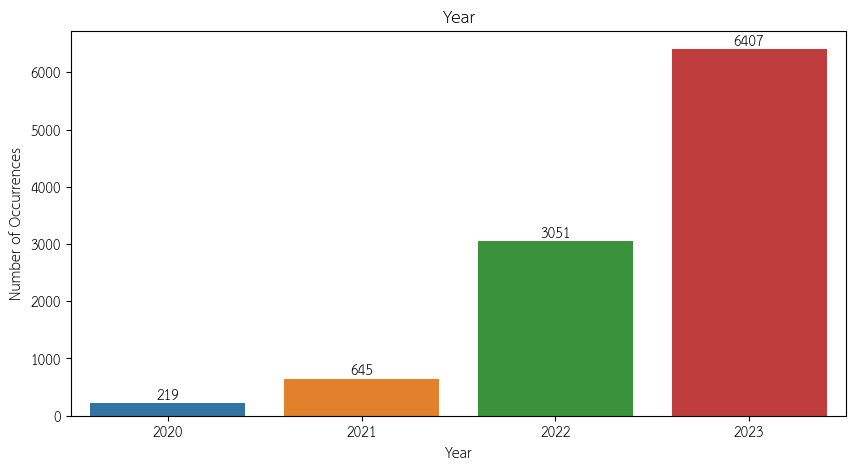

In [ ]:
# แสดงข้อมูลของ "ํYear"
print(Fore.BLUE, f'Year\n')
display(df['Year'].value_counts())
print("")

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(ax=ax, data=df, x=df['Year'])
ax.set(xlabel='Year', ylabel='Number of Occurrences', title=('Year'))
ax.bar_label(ax.containers[0])

plt.show()

จากกราฟจึงทำให้เห็นถึงข้อมูลเชิงลึกเกี่ยวกับการกระจายของข้อมูลต่างๆภายในแต่ละปีตั้งแต่ปี ค.ศ. 2020 ถึง 2023 โดยมีการกระจายตัวอยู่ดังนี้
- 2023 : มีข้อมูลที่บันทึกในปี ค.ศ. 2023 ทั้งหมด 6,407 รายการ
- 2022 : มีข้อมูลที่บันทึกในปี ค.ศ. 2022 ทั้งหมด 3,051 รายการ
- 2021 : มีข้อมูลที่บันทึกในปี ค.ศ. 2021 ทั้งหมด 645 รายการ
- 2020 : มีข้อมูลที่บันทึกในปี ค.ศ. 2020 ทั้งหมด 219 รายการ





 Company Size All year



Medium    8505
Large     1360
Small      457
Name: Company Size, dtype: int64

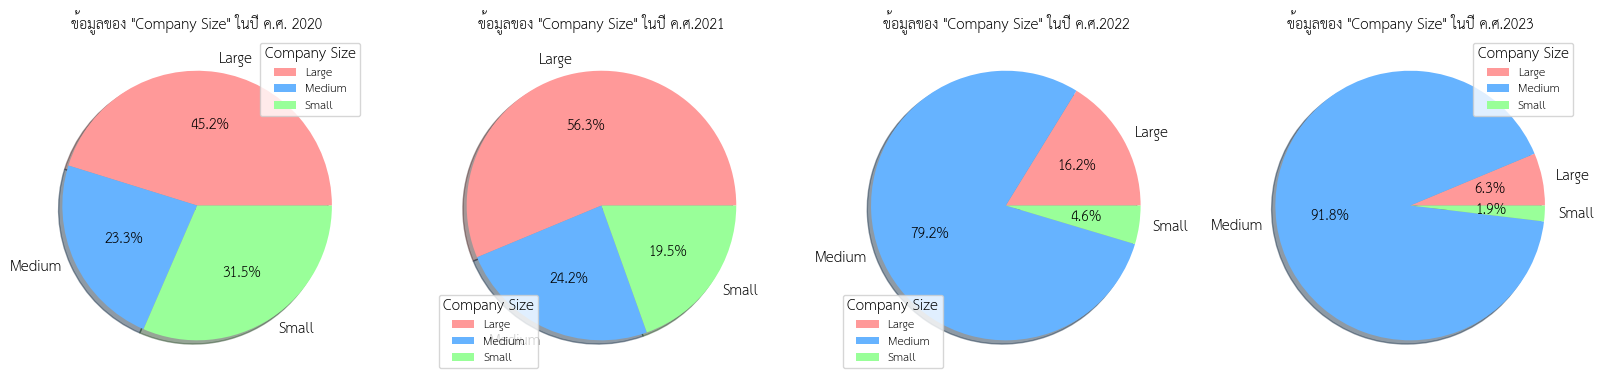

['Large', 'Medium', 'Small']
[99, 51, 69] [363, 156, 126] [495, 2415, 141] [403, 5883, 121]


<ipython-input-10-06d2dfaf6ecc>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].xaxis.set_ticklabels(['','2020','','2021','','2022','','2023'])


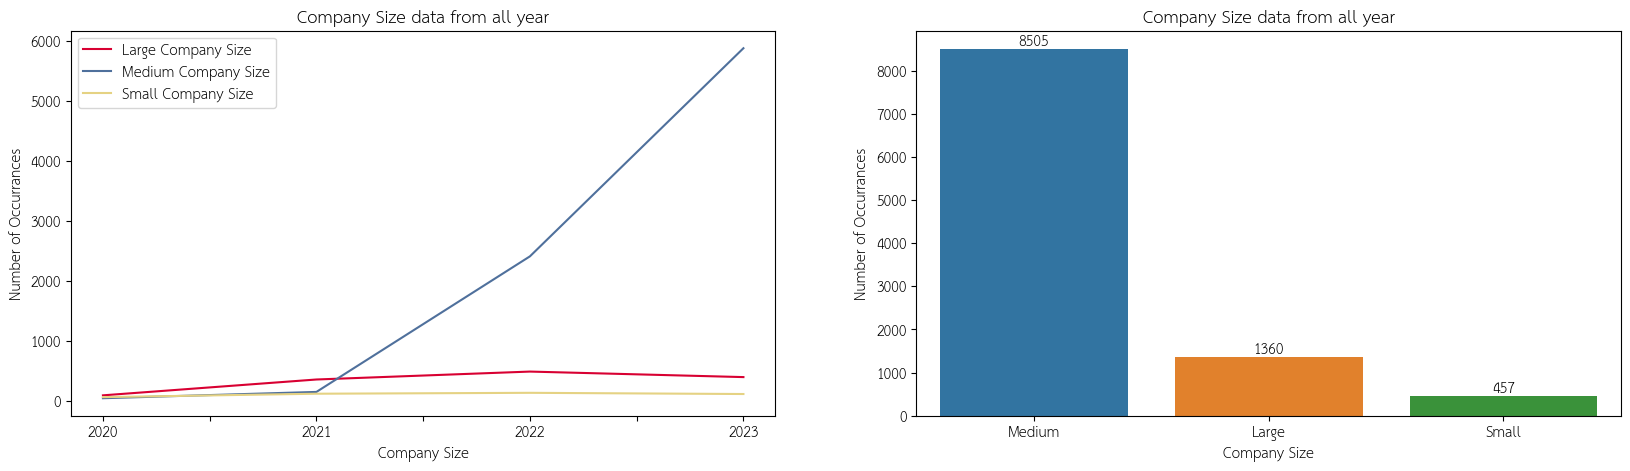

In [ ]:
year = [2020, 2021, 2022, 2023]
column_name = 'Company Size'
# แสดงข้อมูลของ "Company Size" โดยเอาข้อมูลของทุกปี
print(Fore.BLUE, f'Company Size All year\n')
display(df['Company Size'].value_counts())
print("")

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
plt.figure(figsize=(20,15))
color = ['#ff9999', '#66b3ff', '#99ff99']
color_2 = ['#5B0888', '#713ABE', '#9D76C1', '#E5CFF7']

plt.subplot(1, 4, 1)
x1, y1 = volume_data(column_name, year[0])
plt.title(f'ข้อมูลของ \"{column_name}\" ในปี ค.ศ. {year[0]}', fontsize=10)
plt.pie(y1, labels=x1, shadow=True, autopct='%1.1f%%', colors=color)
plt.legend(title=column_name, fontsize=8)

plt.subplot(1, 4, 2)
x2, y2 = volume_data(column_name, year[1])
plt.title(f'ข้อมูลของ \"{column_name}\" ในปี ค.ศ.{year[1]}', fontsize=10)
plt.pie(y2, labels=x2, shadow=True, autopct='%1.1f%%', colors=color)
plt.legend(title=column_name, fontsize=8)

plt.subplot(1, 4, 3)
x3, y3 = volume_data(column_name, year[2])
plt.title(f'ข้อมูลของ \"{column_name}\" ในปี ค.ศ.{year[2]}', fontsize=10)
plt.pie(y3, labels=x3, shadow=True, autopct='%1.1f%%', colors=color)
plt.legend(title=column_name, fontsize=8)

plt.subplot(1, 4, 4)
x4, y4 = volume_data(column_name, year[3])
plt.title(f'ข้อมูลของ \"{column_name}\" ในปี ค.ศ.{year[3]}', fontsize=10)
plt.pie(y4, labels=x4, shadow=True, autopct='%1.1f%%', colors=color)
plt.legend(title=column_name, fontsize=8)

plt.show()

print(x1)
print(y1,y2,y3,y4)
fig, ax = plt.subplots(1, 2, figsize=(20,5))

line_1 = [y1[0], y2[0], y3[0], y4[0]]
line_2 = [y1[1], y2[1], y3[1], y4[1]]
line_3 = [y1[2], y2[2], y3[2], y4[2]]
ax[0].plot(year, line_1, label='Large Company Size', color='#D80032')
ax[0].plot(year, line_2, label='Medium Company Size', color='#4F709C')
ax[0].plot(year, line_3, label='Small Company Size', color='#E5D283')
ax[0].set(xlabel='Company Size', ylabel='Number of Occurrances', title=('Company Size data from all year'))
ax[0].xaxis.set_ticklabels(['','2020','','2021','','2022','','2023'])
ax[0].legend()

sns.countplot(ax=ax[1], data=df, x=df['Company Size'])
ax[1].set(xlabel='Company Size', ylabel='Number of Occurrances', title=('Company Size data from all year'))
ax[1].bar_label(ax[1].containers[0])

plt.show()

จากกราฟแสดงให้เห็นถึงข้อมูลเชิงลึกเกี่ยวกับการเติบโตของบริษัทขนาดต่างๆนับมาตั้งแต่ปี ค.ศ. 2020 ถึง 2023
โดยจากการพล็อตกราฟออกมานั้นจะเห็นได้ว่าตั้งแต่ปี ค.ศ. 2021 บริษัทขนาด "กลาง" มีการเพิ่มจำนวนอย่างก้าวกระโดดและมีแนวโน้มที่เพิ่มสูงขึ้นเรื่อยๆในปีถัดๆไป
- Large : คือ "บริษัทขนาดใหญ่ที่มีพนักงานอย่างน้อย 250 คนขึ้นไป" โดยมีพนักงานทำงานอยู่ในบริษัทประเภทนี้จำนวน 1,360 คน
- Medium : คือ "บริษัทขนาดกลางที่มีพนักงานอย่างน้อย 50 ถึง 249 คน" โดยมีพนักงานทำงานอยู่ในบริษัทประเภทนี้จำนวน 8,505 คน
- Small : คือ "บริษัทขนาดเล็กที่มีพนักงานอย่างน้อย 10 ถึง 49 คน" โดยมีพนักงานทำงานอยู่ในบริษัทประเภทนี้จำนวน 457 คน


Mean Salary in the Dataset : $ 142232
Median Salary in the Dataset : $ 136000
Highest Salary in the Dataset : $ 450000
Lowest Salary in the Dataset : $ 15000


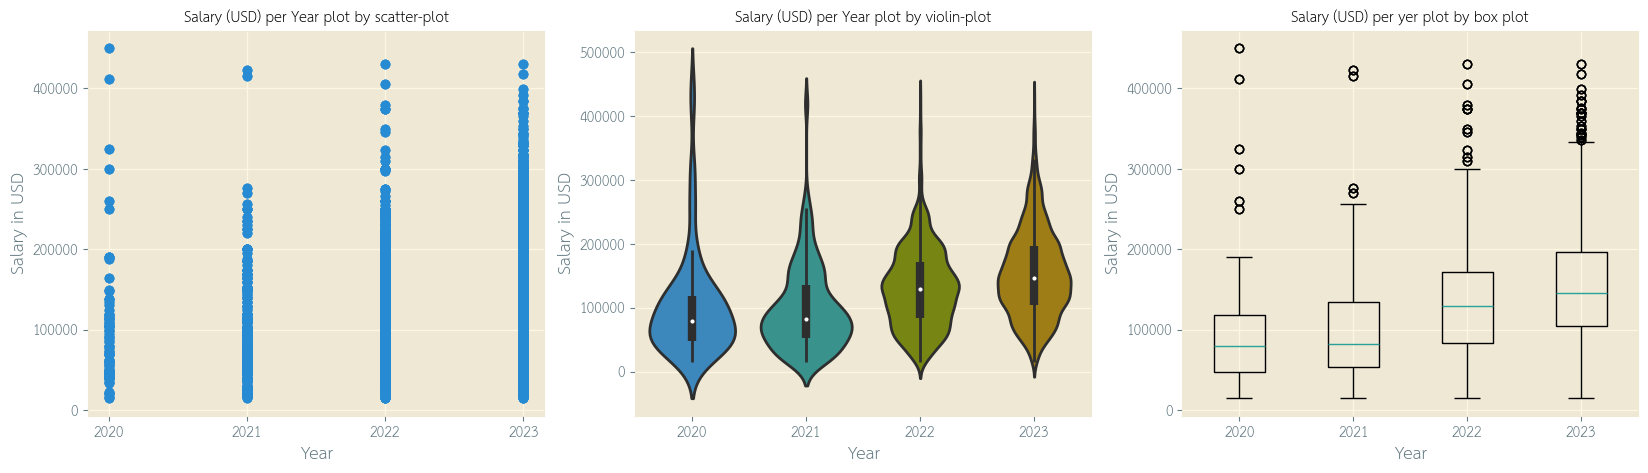

In [ ]:
column_name = 'Salary in USD'
salary_data = Data_with_year(column_name)
salary_data.reverse()
new_data = sort_by_year(salary_data)

mean = round(df['Salary in USD'].mean())
median = round(df['Salary in USD'].median())
maximum = round(df['Salary in USD'].max())
minimun = round(df['Salary in USD'].min())
print(f'Mean Salary in the Dataset : $ {mean}')
print(f'Median Salary in the Dataset : $ {median}')
print(f'Highest Salary in the Dataset : $ {maximum}')
print(f'Lowest Salary in the Dataset : $ {minimun}')

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
plt.figure(figsize=(20,5))
plt.style.use('Solarize_Light2')

# scatter plot
plt.subplot(1, 3, 1)
plt.title('Salary (USD) per Year plot by scatter-plot', fontsize=10)
plt.scatter(*zip(*new_data))
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.xticks(np.arange(2020,2024,step=1))

# violin plot
plt.subplot(1, 3, 2)
plt.title('Salary (USD) per Year plot by violin-plot', fontsize=10)
sns.violinplot(data=df, x='Year', y='Salary in USD')

# box plot
plt.subplot(1, 3, 3)
plt.title('Salary (USD) per yer plot by box plot', fontsize=10)
data1 = Data_per_year(column_name, year[0])
data2 = Data_per_year(column_name, year[1])
data3 = Data_per_year(column_name, year[2])
data4 = Data_per_year(column_name, year[3])
data_list = [data1, data2, data3, data4]
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.boxplot(data_list)
plt.xticks(np.arange(1,5), ['2020','2021','2022','2023'])

plt.show()

จากการพล็อตกราฟของเงินเดือนเฉลี่ยในแต่ละปีออกมาทั้งหมด 3 รูปแบบ ได้แก่ scatter plot, violin plot และ box plot พบว่าในปี ค.ศ.2020 มีการกระจายตัวของข้อมูลค่อนข้างมาก และน้อยลงตามลำดับในปีถัดๆไป อาจจะเนื่องมาจากมีข้อมูลที่ค่อนข้างน้อย แต่เมื่อมองไปยังการเปรียบเทียบของค่าเฉลี่ยของแต่ละปีนั้น จะสังเกตเห็นได้ว่าค่าเฉลี่ยเงินเดือนของแต่ละปีนั้นมีการเพิ่มขึ้นเรื่อยๆอย่างมีนัยสำคัญและคาดว่าในปีถัดไปก็จะมีแนวโน้มที่เพิ่มขึ้นไปอีก

 Top 10 Best IT jobs in 2023



Data Engineer                1312
Data Scientist               1134
Data Analyst                  889
Machine Learning Engineer     647
Analytics Engineer            275
Research Scientist            244
Research Engineer             165
Data Architect                159
ML Engineer                   129
Applied Scientist             122
Name: Job Title, dtype: int64


 
Top 10 Best IT jobs in 2022



Data Engineer                 723
Data Scientist                666
Data Analyst                  453
Machine Learning Engineer     228
Analytics Engineer            141
Data Science Manager           90
Data Architect                 90
Research Scientist             45
ML Engineer                    45
Machine Learning Scientist     39
Name: Job Title, dtype: int64


 
Top 10 Best IT jobs in 2021



Data Scientist               117
Data Engineer                105
Data Analyst                  60
Machine Learning Engineer     54
Research Scientist            30
Data Science Manager          18
Principal Data Scientist      15
Director of Data Science      15
Data Science Consultant       15
Big Data Engineer             12
Name: Job Title, dtype: int64


 
Top 10 Best IT jobs in 2020



Data Scientist               63
Data Engineer                39
Data Analyst                 18
Machine Learning Engineer    12
Business Data Analyst         9
Big Data Engineer             9
Lead Data Scientist           6
Research Scientist            6
Lead Data Engineer            6
Principal Data Scientist      3
Name: Job Title, dtype: int64


 
Top 10 Best IT jobs in all year



Data Engineer                2179
Data Scientist               1980
Data Analyst                 1420
Machine Learning Engineer     941
Analytics Engineer            416
Research Scientist            325
Data Architect                258
ML Engineer                   189
Research Engineer             187
Data Science Manager          181
Name: Job Title, dtype: int64

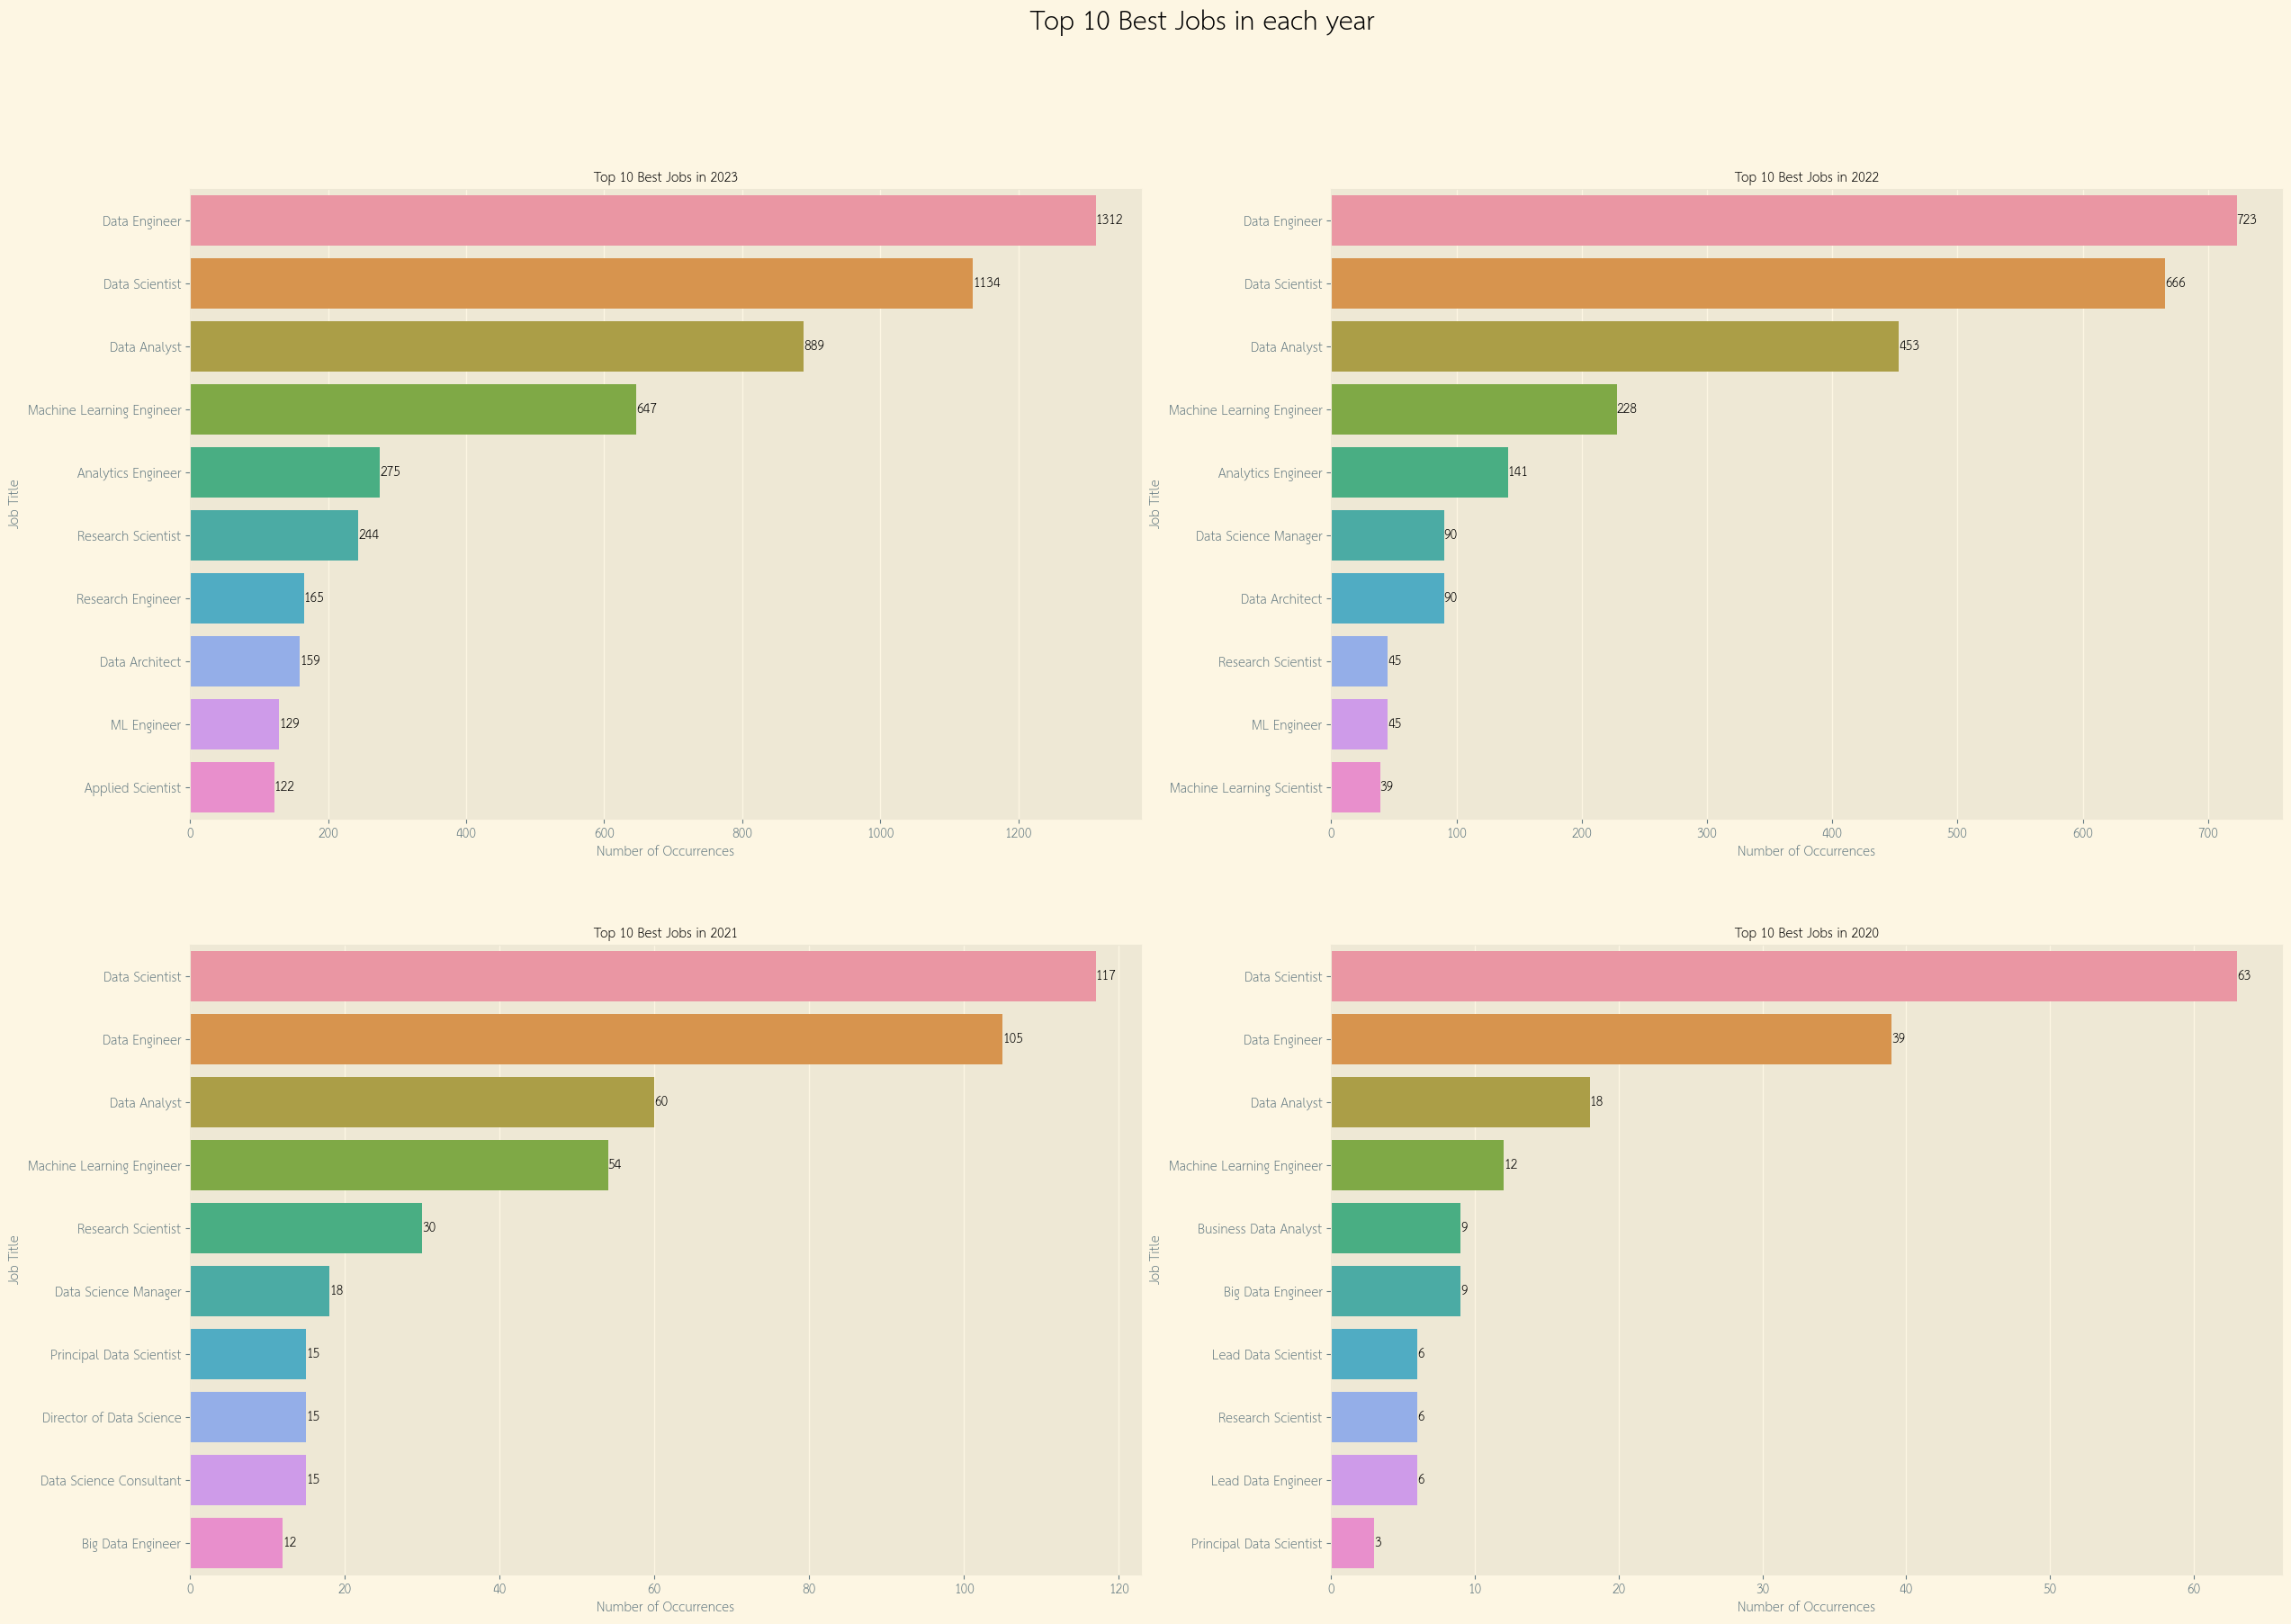

In [ ]:
# แสดงข้อมูลของ "๋Job Title" โดยเอาข้อมูลของแต่ละปี
top_10_jobs_2023 = df[df['Year'] == 2023]['Job Title'].value_counts().nlargest(10)
print(Fore.BLUE, f"Top 10 Best IT jobs in 2023\n")
display(top_10_jobs_2023)
print("")
top_10_jobs_2022 = df[df['Year'] == 2022]['Job Title'].value_counts().nlargest(10)
print(Fore.BLUE, f"\nTop 10 Best IT jobs in 2022\n")
display(top_10_jobs_2022)
print("")
top_10_jobs_2021 = df[df['Year'] == 2021]['Job Title'].value_counts().nlargest(10)
print(Fore.BLUE, f"\nTop 10 Best IT jobs in 2021\n")
display(top_10_jobs_2021)
print("")
top_10_jobs_2020 = df[df['Year'] == 2020]['Job Title'].value_counts().nlargest(10)
print(Fore.BLUE, f"\nTop 10 Best IT jobs in 2020\n")
display(top_10_jobs_2020)
print("")
# แสดงข้อมูลของ "๋Job Title" โดยเอาข้อมูลของทุกปี
top_10_jobs_all = df['Job Title'].value_counts().nlargest(10)
print(Fore.BLUE, f'\nTop 10 Best IT jobs in all year\n')
display(top_10_jobs_all)
print("")

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
jobs_2023 = df[df['Year'] == 2023]['Job Title'].value_counts().nlargest(10).reset_index()
jobs_2022 = df[df['Year'] == 2022]['Job Title'].value_counts().nlargest(10).reset_index()
jobs_2021 = df[df['Year'] == 2021]['Job Title'].value_counts().nlargest(10).reset_index()
jobs_2020 = df[df['Year'] == 2020]['Job Title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots(2, 2, figsize=(30,20))
fig.suptitle('Top 10 Best Jobs in each year', fontsize=20)

# พล็อตของปี ค.ศ. 2023
sns.barplot(ax=ax[0,0], data=jobs_2023, y=jobs_2023['index'], x=jobs_2023['Job Title'])
ax[0,0].set_title('Top 10 Best Jobs in 2023', fontsize=10)
ax[0,0].set_xlabel('Number of Occurrences', fontsize=10)
ax[0,0].set_ylabel('Job Title', fontsize=10)
ax[0,0].bar_label(ax[0,0].containers[0])

# พล็อตของปี ค.ศ. 2022
sns.barplot(ax=ax[0,1], data=jobs_2022, y=jobs_2022['index'], x=jobs_2022['Job Title'])
ax[0,1].set_title('Top 10 Best Jobs in 2022', fontsize=10)
ax[0,1].set_xlabel('Number of Occurrences', fontsize=10)
ax[0,1].set_ylabel('Job Title', fontsize=10)
ax[0,1].bar_label(ax[0,1].containers[0])

# พล็อตของปี ค.ศ. 2021
sns.barplot(ax=ax[1,0], data=jobs_2021, y=jobs_2021['index'], x=jobs_2021['Job Title'])
ax[1,0].set_title('Top 10 Best Jobs in 2021', fontsize=10)
ax[1,0].set_xlabel('Number of Occurrences', fontsize=10)
ax[1,0].set_ylabel('Job Title', fontsize=10)
ax[1,0].bar_label(ax[1,0].containers[0])

# พล็อตของปี ค.ศ. 2020
sns.barplot(ax=ax[1,1], data=jobs_2020, y=jobs_2020['index'], x=jobs_2020['Job Title'])
ax[1,1].set_title('Top 10 Best Jobs in 2020', fontsize=10)
ax[1,1].set_xlabel('Number of Occurrences', fontsize=10)
ax[1,1].set_ylabel('Job Title', fontsize=10)
ax[1,1].bar_label(ax[1,1].containers[0])

plt.show()

 Employment Type All year



Full-Time    10205
Contract        45
Part-Time       39
Freelance       33
Name: Employment Type, dtype: int64

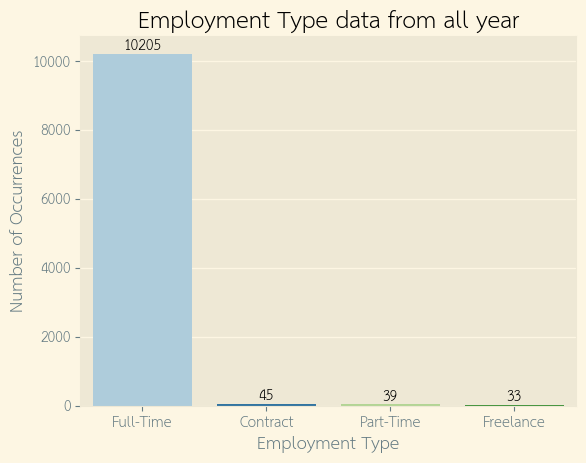

In [ ]:
print(Fore.BLUE, f"Employment Type All year\n")
display(df['Employment Type'].value_counts())
print("")

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
fig, ax = plt.subplots()
sns.set_palette("Paired")
sns.countplot(ax=ax, data=df, x=df['Employment Type'])
ax.set(xlabel='Employment Type', ylabel='Number of Occurrences', title=('Employment Type data from all year'))
ax.bar_label(ax.containers[0])

plt.show()

 Experience Level All year



Senior       6486
Mid          2487
Entry         895
Executive     454
Name: Experience Level, dtype: int64


 Expertise Level All year



Expert          6486
Intermediate    2487
Junior           895
Director         454
Name: Expertise Level, dtype: int64

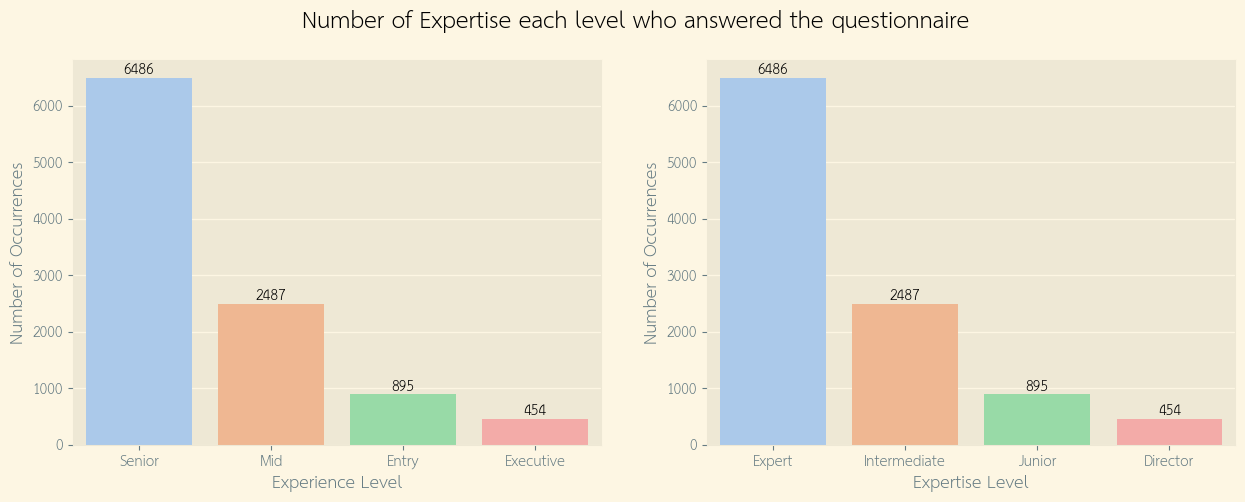

In [ ]:
print(Fore.BLUE, f"Experience Level All year\n")
display(df['Experience Level'].value_counts())
print("")
print(Fore.BLUE, f"Expertise Level All year\n")
display(df['Expertise Level'].value_counts())
print("")

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Number of Expertise each level who answered the questionnaire', fontsize=(16))
sns.set_palette("pastel")
sns.countplot(ax=ax[0], data=df, x=df['Experience Level'], order=df['Experience Level'].value_counts().index)
ax[0].set(xlabel='Experience Level', ylabel='Number of Occurrences')
ax[0].bar_label(ax[0].containers[0])

sns.set_palette("pastel")
sns.countplot(ax=ax[1], data=df, x=df['Expertise Level'], order=df['Expertise Level'].value_counts().index)
ax[1].set(xlabel='Expertise Level', ylabel='Number of Occurrences')
ax[1].bar_label(ax[1].containers[0])

plt.show()

จากการพล็อตกราฟของ "Expertise Level" และ "Experience Level" ออกมานั้นจะเห็นได้ว่าข้อมูลของทั้ง 2 กราฟนี้มีความเหมือนกันทุกประการโดยจะสรุปได้ว่า "Expertise Level" กับ "Experience Level" คือข้อมูลตัวเดียวกันซึ่งค่าตัวแปรของข้อมูล "Expertise Level" คือ "Expert", "Intermediate", "Director" และ "Junior จะไปเหมือนกับค่าตัวแปรของข้อมูล "Experiense Level" คือ "Senior", "Mid", "Executive" และ "Entry" ตามลำดับซึ่งในการทำการทดลองทางเราอาจจะใช้ข้อมูลสลับกันไปบ้างแต่ของให้รู้ไว้ว่าข้อมูล 2 ตัวนี้มีข้อมูลที่เหมือนกัน

 Top 10 Company Location data from all year



United States     7793
United Kingdom     789
Canada             355
Germany            201
Spain              149
India              136
France             126
Australia           63
Portugal            48
Netherlands         44
Name: Company Location, dtype: int64

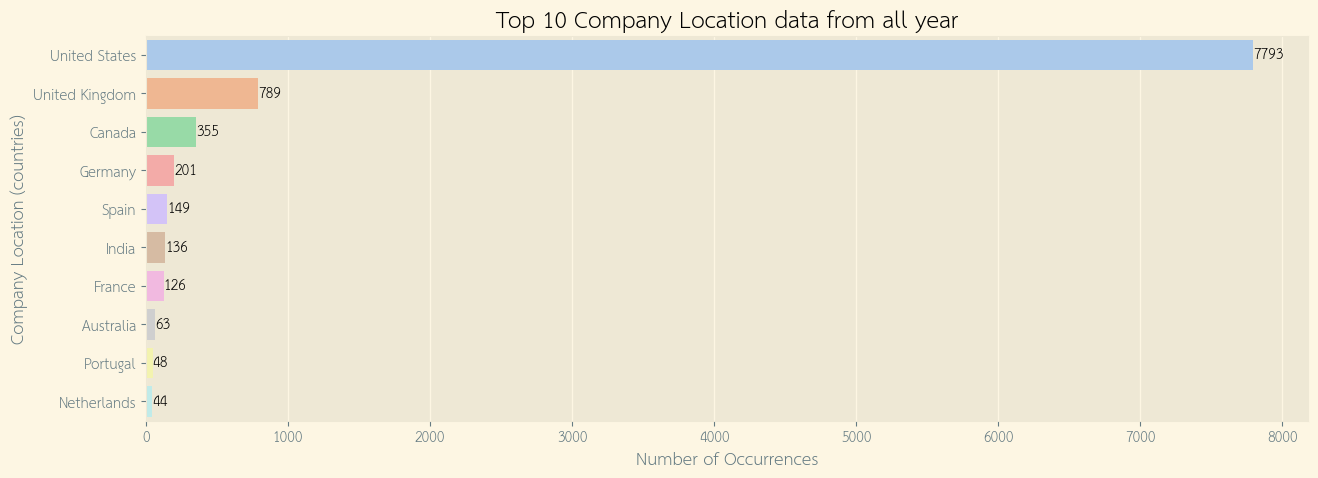

 
Top 10 Counties with mean higest salary data from all year


Company Location
Israel                    217332.000000
Puerto Rico               167500.000000
United States             158307.223149
Canada                    137037.532394
Saudi Arabia              134999.000000
New Zealand               125000.000000
Australia                 122133.619048
Bosnia and Herzegovina    120000.000000
Ireland                   115188.285714
Japan                     110821.625000
Name: Salary in USD, dtype: float64


 
Top 10 Counties with mean lowest salary data from all year


Company Location
Ecuador                 16000.000000
Moldova, Republic of    18000.000000
Honduras                20000.000000
Turkey                  22313.600000
Egypt                   22800.000000
Thailand                22971.333333
Hungary                 26709.500000
Malta                   28369.000000
Ghana                   28500.000000
Pakistan                30000.000000
Name: Salary in USD, dtype: float64

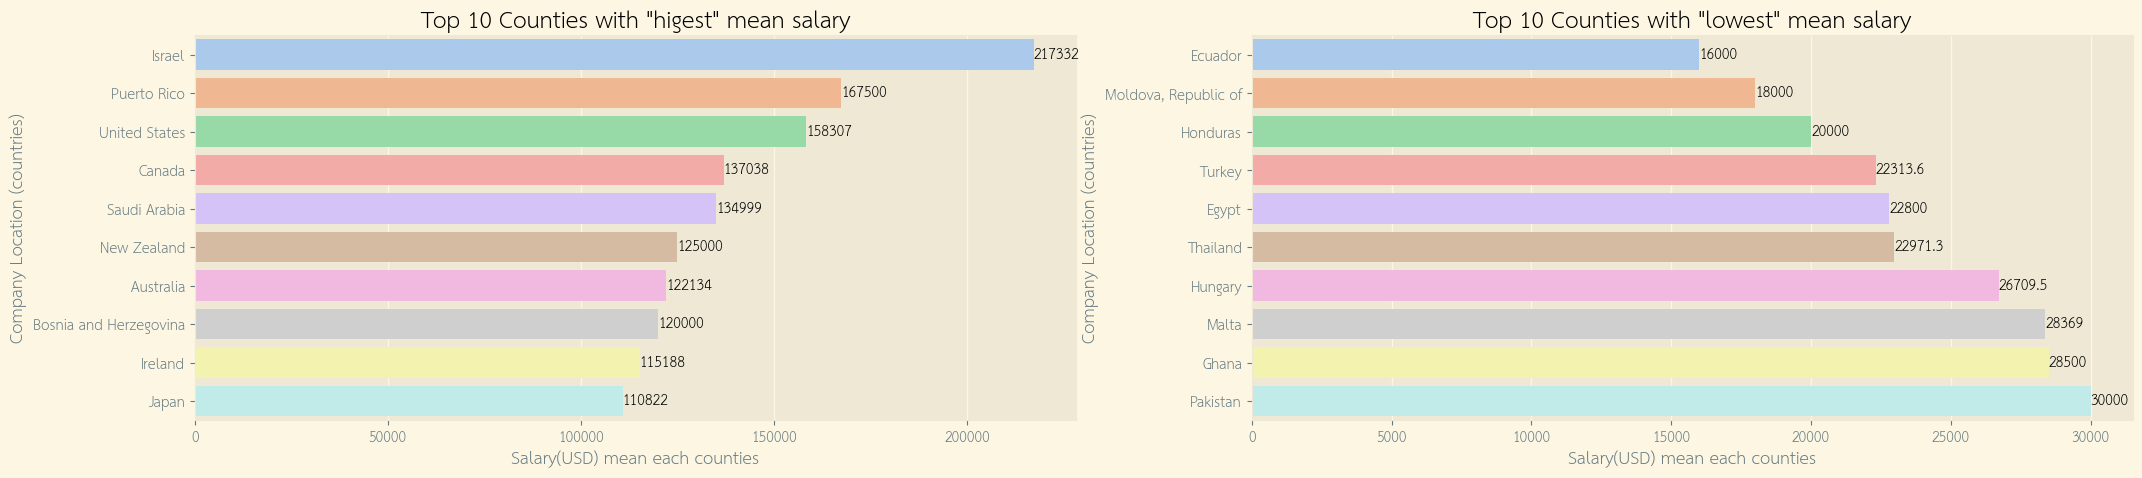

 
Top 10 Counties with median higest salary data from all year


Company Location
Puerto Rico               167500.0
United States             150000.0
Saudi Arabia              134999.0
Canada                    130000.0
New Zealand               125000.0
Bosnia and Herzegovina    120000.0
Israel                    119059.0
United Arab Emirates      115000.0
Switzerland               104697.0
Ireland                   102569.0
Name: Salary in USD, dtype: float64


 
Top 10 Counties with mean lowest salary data from all year


Company Location
Ecuador                 16000.0
Moldova, Republic of    18000.0
Honduras                20000.0
Turkey                  20171.0
Egypt                   22800.0
India                   24342.0
Thailand                24613.0
Hungary                 26709.5
Malta                   28369.0
Ghana                   30000.0
Name: Salary in USD, dtype: float64

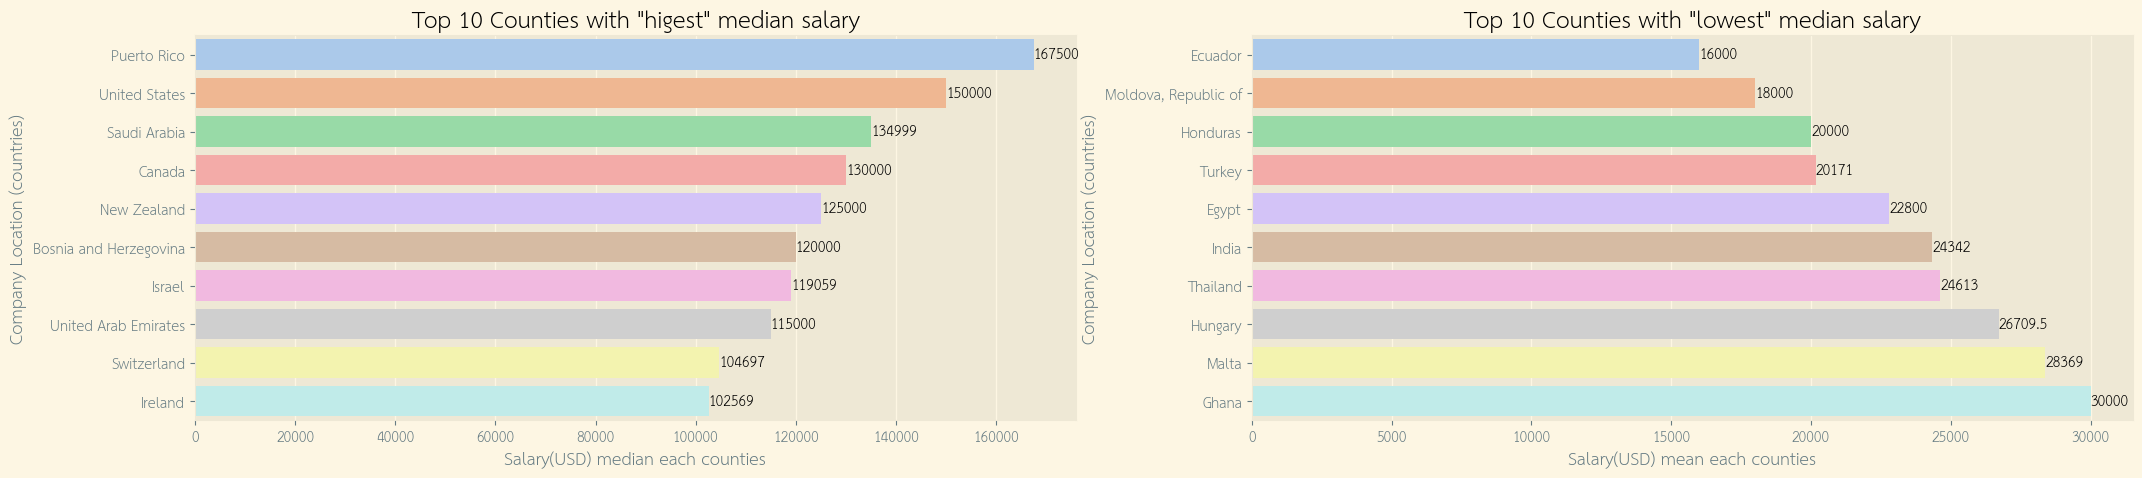

In [ ]:
print(Fore.BLUE, f'Top 10 Company Location data from all year\n')
display(df['Company Location'].value_counts().nlargest(10))
print("")

# ตั้งแต่บรรทัดนี้ลงไปเป็นโค้ดในการพล็อตกราฟ
location_top_10 = df['Company Location'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.set_palette("pastel")
sns.barplot(ax=ax, data=location_top_10, y=location_top_10['index'], x=location_top_10['Company Location'])
ax.set(xlabel='Number of Occurrences', ylabel='Company Location (countries)', title=('Top 10 Company Location data from all year'))
ax.bar_label(ax.containers[0])

plt.show()

print(Fore.BLUE, f'\nTop 10 Counties with mean higest salary data from all year')
display(df.groupby('Company Location')['Salary in USD'].mean().nlargest(10))
print("")

top_counties_salary_mean_high = df.groupby('Company Location')["Salary in USD"].mean().nlargest(10).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(25,5))
sns.set_palette("pastel")
sns.barplot(ax=ax[0], data=top_counties_salary_mean_high, y=top_counties_salary_mean_high['Company Location'], x=top_counties_salary_mean_high['Salary in USD'])
ax[0].set(xlabel='Salary(USD) mean each counties', ylabel='Company Location (countries)', title=('Top 10 Counties with \"higest\" mean salary'))
ax[0].bar_label(ax[0].containers[0])

print(Fore.BLUE, f'\nTop 10 Counties with mean lowest salary data from all year')
display(df.groupby('Company Location')['Salary in USD'].mean().nsmallest(10))
print("")

top_counties_salary_mean_low = df.groupby('Company Location')['Salary in USD'].mean().nsmallest(10).reset_index()
sns.barplot(ax=ax[1], data=top_counties_salary_mean_low, y=top_counties_salary_mean_low['Company Location'], x=top_counties_salary_mean_low['Salary in USD'])
ax[1].set(xlabel='Salary(USD) mean each counties', ylabel='Company Location (countries)', title=('Top 10 Counties with \"lowest\" mean salary'))
ax[1].bar_label(ax[1].containers[0])

plt.show()

print(Fore.BLUE, f'\nTop 10 Counties with median higest salary data from all year')
display(df.groupby('Company Location')['Salary in USD'].median().nlargest(10))
print("")

top_counties_salary_median_high = df.groupby('Company Location')["Salary in USD"].median().nlargest(10).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(25,5))
sns.set_palette("pastel")
sns.barplot(ax=ax[0], data=top_counties_salary_median_high, y=top_counties_salary_median_high['Company Location'], x=top_counties_salary_median_high['Salary in USD'])
ax[0].set(xlabel='Salary(USD) median each counties', ylabel='Company Location (countries)', title=('Top 10 Counties with \"higest\" median salary'))
ax[0].bar_label(ax[0].containers[0])

print(Fore.BLUE, f'\nTop 10 Counties with mean lowest salary data from all year')
display(df.groupby('Company Location')['Salary in USD'].median().nsmallest(10))
print("")

top_counties_salary_median_low = df.groupby('Company Location')['Salary in USD'].median().nsmallest(10).reset_index()
sns.barplot(ax=ax[1], data=top_counties_salary_median_low, y=top_counties_salary_median_low['Company Location'], x=top_counties_salary_median_low['Salary in USD'])
ax[1].set(xlabel='Salary(USD) mean each counties', ylabel='Company Location (countries)', title=('Top 10 Counties with \"lowest\" median salary'))
ax[1].bar_label(ax[1].containers[0])

plt.show()

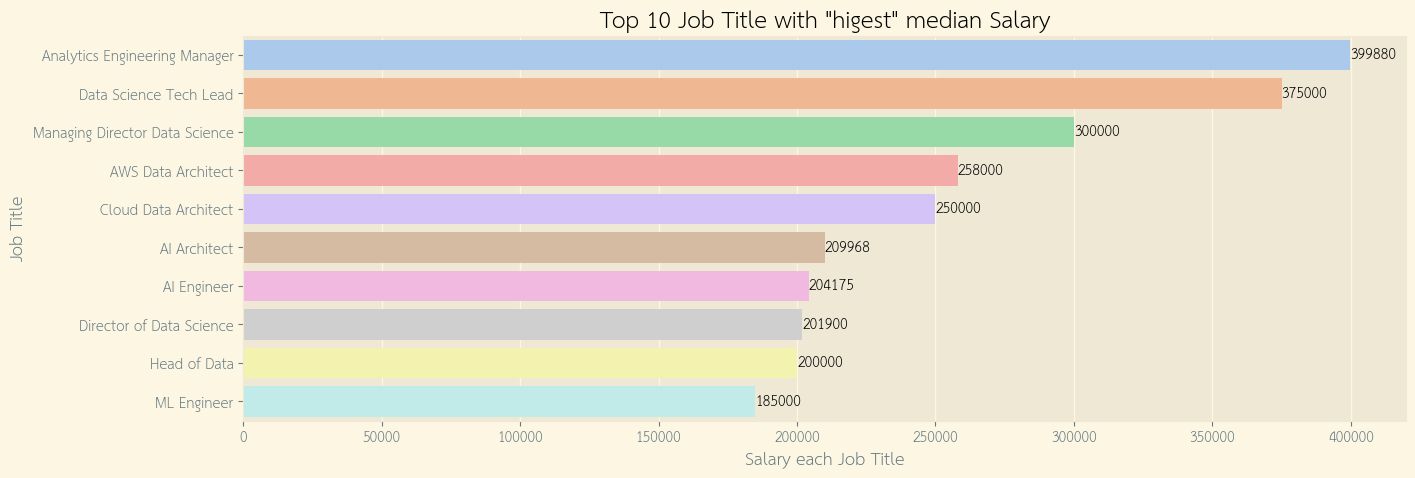

In [ ]:
top_10_salary_job = df.groupby('Job Title')['Salary in USD'].median().nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=ax, data=top_10_salary_job, y=top_10_salary_job['Job Title'], x=top_10_salary_job['Salary in USD'])
ax.set(xlabel='Salary each Job Title', ylabel='Job Title', title=('Top 10 Job Title with \"higest\" median Salary'))
ax.bar_label(ax.containers[0])
plt.show()

## ตอบคำถามที่น่าสนใจ

### Q1 : ประเภทการจ้างงานแบบไหนได้รายได้มากกว่ากันเมื่อเทียบโดยเงินเดือนสูงสุดของแต่ละประเภท

In [ ]:
max_salary_by_employment = df.groupby('Employment Type')['Salary in USD'].idxmax()
higest_salary_by_employment = df.loc[max_salary_by_employment, ['Expertise Level','Employment Type','Job Title','Salary in USD']]
print('Higest Salary in USD by Employment Type')
display(higest_salary_by_employment)

Higest Salary in USD by Employment Type


,Expertise Level,Employment Type,Job Title,Salary in USD
3228,Director,Contract,Principal Data Scientist,416000
2337,Junior,Freelance,Machine Learning Engineer,100000
3085,Intermediate,Full-Time,Research Scientist,450000
2458,Junior,Part-Time,Data Analyst,125404


### Q2 : ระดับความเชี่ยวชาญระดับไหนได้รายได้มากกว่าเมื่อเทียบโดยเงินเดือนสูงสุดของแต่ละระดับ

In [ ]:
max_salary_by_expertise = df.groupby('Expertise Level')['Salary in USD'].idxmax()
higest_salary_by_expertise = df.loc[max_salary_by_expertise, ['Expertise Level','Employment Type','Job Title','Salary in USD']]
print('Higest Salary in USD by Expertise Level')
display(higest_salary_by_expertise)

Higest Salary in USD by Expertise Level


,Expertise Level,Employment Type,Job Title,Salary in USD
3228,Director,Contract,Principal Data Scientist,416000
1496,Expert,Full-Time,AI Scientist,417937
3085,Intermediate,Full-Time,Research Scientist,450000
399,Junior,Full-Time,Research Scientist,250800


### Q3 : ระดับความเชี่ยวชาญระดับไหนได้รายได้มากกว่าเมื่อเทียบค่าเฉลี่ยโดยสุ่มตัวอย่างในปี ค.ศ. 2023 มา 5 ตัวอย่าง

In [ ]:
director_2023 = df[(df['Year'] == 2023) & (df['Expertise Level'] == 'Director')]['Salary in USD'].sample(5).mean()
expert_2023 = df[(df['Year'] == 2023) & (df['Expertise Level'] == 'Expert')]['Salary in USD'].sample(5).mean()
intermediate_2023 = df[(df['Year'] == 2023) & (df['Expertise Level'] == 'Intermediate')]['Salary in USD'].sample(5).mean()
junior_2023 = df[(df['Year'] == 2023) & (df['Expertise Level'] == 'Junior')]['Salary in USD'].sample(5).mean()

print(f'Average Expertise each level\n')
print(f'Expertise Level \"Director\" : $ {director_2023:.2f}')
print(f'Expertise Level \"Expert\" : $ {expert_2023:.2f}')
print(f'Expertise Level \"Intermediate\" : $ {intermediate_2023:.2f}')
print(f'Expertise Level \"Junior\" : $ {junior_2023:.2f}')

Average Expertise each level

Expertise Level "Director" : $ 175200.00
Expertise Level "Expert" : $ 138706.00
Expertise Level "Intermediate" : $ 76861.20
Expertise Level "Junior" : $ 59939.60


### Q4 : ระดับความเชี่ยวชาญแต่ละระดับนั้นทำงานให้กับบริษัทขนาดต่างๆจำนวนเท่าไหร่บ้าง

Q4.1 : บริษัทที่มีขนาดใหญ่ (large company)

In [ ]:
director_large = len(df[(df['Company Size'] == 'Large') & (df['Expertise Level'] == 'Director')])
expert_large = len(df[(df['Company Size'] == 'Large') & (df['Expertise Level'] == 'Expert')])
intermediate_large = len(df[(df['Company Size'] == 'Large') & (df['Expertise Level'] == 'Intermediate')])
junior_large = len(df[(df['Company Size'] == 'Large') & (df['Expertise Level'] == 'Junior')])
large_total = director_large + expert_large + intermediate_large + junior_large

print(f'Each level of expertise works for \"large\" company\n')
print(f'Expertise Level \"Director\" : {director_large} units')
print(f'Expertise Level \"Expert\" : {expert_large} units')
print(f'Expertise Level \"Intermediate\" : {intermediate_large} units')
print(f'Expertise Level \"Junior\" : {junior_large} units')
print(f'Total : {large_total} units')

Each level of expertise works for "large" company

Expertise Level "Director" : 50 units
Expertise Level "Expert" : 596 units
Expertise Level "Intermediate" : 432 units
Expertise Level "Junior" : 282 units
Total : 1360 units


Q4.2 : บริษัทที่มีขนาดกลาง (medium company)

In [ ]:
director_medium = len(df[(df['Company Size'] == 'Medium') & (df['Expertise Level'] == 'Director')])
expert_medium = len(df[(df['Company Size'] == 'Medium') & (df['Expertise Level'] == 'Expert')])
intermediate_medium = len(df[(df['Company Size'] == 'Medium') & (df['Expertise Level'] == 'Intermediate')])
junior_medium = len(df[(df['Company Size'] == 'Medium') & (df['Expertise Level'] == 'Junior')])
medium_total = director_medium + expert_medium + intermediate_medium + junior_medium

print(f'Each level of expertise works for \"medium\" company\n')
print(f'Expertise Level \"Director\" : {director_medium} units')
print(f'Expertise Level \"Expert\" : {expert_medium} units')
print(f'Expertise Level \"Intermediate\" : {intermediate_medium} units')
print(f'Expertise Level \"Junior\" : {junior_medium} units')
print(f'Total : {medium_total} units')

Each level of expertise works for "medium" company

Expertise Level "Director" : 380 units
Expertise Level "Expert" : 5749 units
Expertise Level "Intermediate" : 1897 units
Expertise Level "Junior" : 479 units
Total : 8505 units


Q4.3 : บริษัทที่มีขนาดเล็ก (small company)

In [ ]:
director_small = len(df[(df['Company Size'] == 'Small') & (df['Expertise Level'] == 'Director')])
expert_small = len(df[(df['Company Size'] == 'Small') & (df['Expertise Level'] == 'Expert')])
intermediate_small = len(df[(df['Company Size'] == 'Small') & (df['Expertise Level'] == 'Intermediate')])
junior_small = len(df[(df['Company Size'] == 'Small') & (df['Expertise Level'] == 'Junior')])
small_total = director_small + expert_small + intermediate_small + junior_small

print(f'Each level of expertise works for \"small\" company\n')
print(f'Expertise Level \"Director\" : {director_small} units')
print(f'Expertise Level \"Expert\" : {expert_small} units')
print(f'Expertise Level \"Intermediate\" : {intermediate_small} units')
print(f'Expertise Level \"Junior\" : {junior_small} units')
print(f'Total : {small_total} units')

Each level of expertise works for "small" company

Expertise Level "Director" : 24 units
Expertise Level "Expert" : 141 units
Expertise Level "Intermediate" : 158 units
Expertise Level "Junior" : 134 units
Total : 457 units


### Q5 : ท็อป 10 งานในสาย IT ที่มาแรงและไม่เป็นที่นิยม ในปี ค.ศ.2023

In [ ]:
top_10_IT_job_high = df['Job Title'].value_counts().nlargest(10)
print(Fore.BLUE, f'Top 10 popular job in 2023\n')
display(top_10_IT_job_high)

top_10_IT_job_low = df['Job Title'].value_counts().nsmallest(10)
print(Fore.BLUE, f'\nTop 10 unpopular job in 2023\n')
display(top_10_IT_job_low)

 Top 10 popular job in 2023



Data Engineer                2179
Data Scientist               1980
Data Analyst                 1420
Machine Learning Engineer     941
Analytics Engineer            416
Research Scientist            325
Data Architect                258
ML Engineer                   189
Research Engineer             187
Data Science Manager          181
Name: Job Title, dtype: int64

 
Top 10 unpopular job in 2023



AI Research Engineer             2
Power BI Developer               2
Data Management Specialist       3
Principal Data Architect         3
Head of Machine Learning         3
Cloud Data Architect             3
Data Science Tech Lead           3
Analytics Engineering Manager    3
Manager Data Management          3
Marketing Data Engineer          3
Name: Job Title, dtype: int64

### Q6 : ท็อป 10 ประเทศที่ให้เงินเดือนสูงสุดและต่ำสุด ค่าฐานนิยมและค่าเฉลี่ยตามลำดับ ในปี ค.ศ.2023

In [ ]:
top_10_counties_high = df.groupby('Company Location')['Salary in USD'].median().nlargest(10).round(2)
print(Fore.BLUE, f'Top 10 Counties \'high median\' salary in 2023\n')
display(top_10_counties_high)

top_10_counties_low = df.groupby('Company Location')['Salary in USD'].median().nsmallest(10).round(2)
print(Fore.BLUE, f'\nTop 10 Counties \'low median\' salary in 2023\n')
display(top_10_counties_low)

top_10_mean_high = df.groupby('Company Location')['Salary in USD'].mean().nlargest(10).round(2)
print(Fore.BLUE, f'\nTop 10 Counties \'high mean\' salary in 2023\n')
display(top_10_mean_high)

top_10_mean_low = df.groupby('Company Location')['Salary in USD'].mean().nlargest(10).round(2)
print(Fore.BLUE, f'\nTop 10 Counties \'low mean\' salary in 2023\n')
display(top_10_mean_low)

 Top 10 Counties 'high median' salary in 2023



Company Location
Puerto Rico               167500.0
United States             150000.0
Saudi Arabia              134999.0
Canada                    130000.0
New Zealand               125000.0
Bosnia and Herzegovina    120000.0
Israel                    119059.0
United Arab Emirates      115000.0
Switzerland               104697.0
Ireland                   102569.0
Name: Salary in USD, dtype: float64

 
Top 10 Counties 'low median' salary in 2023



Company Location
Ecuador                 16000.0
Moldova, Republic of    18000.0
Honduras                20000.0
Turkey                  20171.0
Egypt                   22800.0
India                   24342.0
Thailand                24613.0
Hungary                 26709.5
Malta                   28369.0
Ghana                   30000.0
Name: Salary in USD, dtype: float64

 
Top 10 Counties 'high mean' salary in 2023



Company Location
Israel                    217332.00
Puerto Rico               167500.00
United States             158307.22
Canada                    137037.53
Saudi Arabia              134999.00
New Zealand               125000.00
Australia                 122133.62
Bosnia and Herzegovina    120000.00
Ireland                   115188.29
Japan                     110821.62
Name: Salary in USD, dtype: float64

 
Top 10 Counties 'low mean' salary in 2023



Company Location
Israel                    217332.00
Puerto Rico               167500.00
United States             158307.22
Canada                    137037.53
Saudi Arabia              134999.00
New Zealand               125000.00
Australia                 122133.62
Bosnia and Herzegovina    120000.00
Ireland                   115188.29
Japan                     110821.62
Name: Salary in USD, dtype: float64

## เจาะลึกเกี่ยวกับตัวแปรแต่ละตัวที่จะส่งผลต่อเงินเดือน

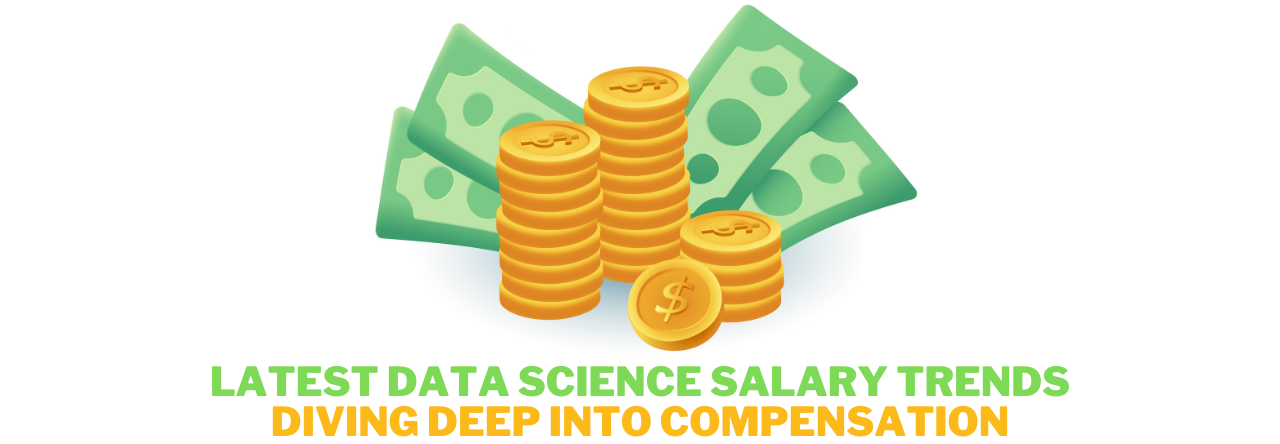

In [ ]:
Image("https://i.imgur.com/d55Kzgv.png")

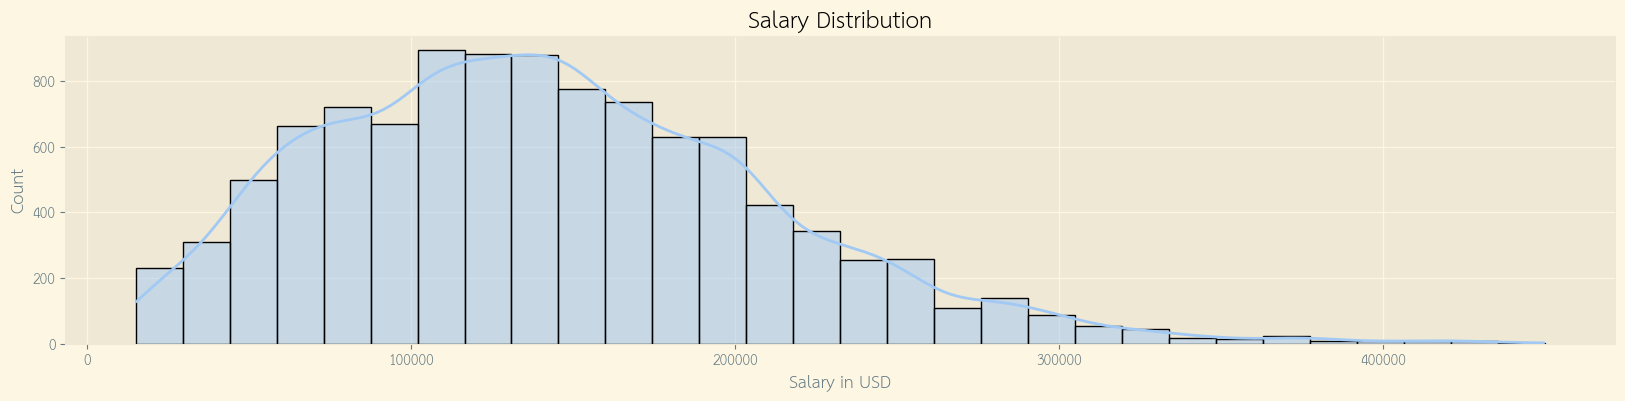

In [ ]:
# แจกแจงข้อมูลของเงินเดือนทั้งหมดในชุดข้อมูล
plt.figure(figsize=(20,4))
sns.histplot(df['Salary in USD'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.show()

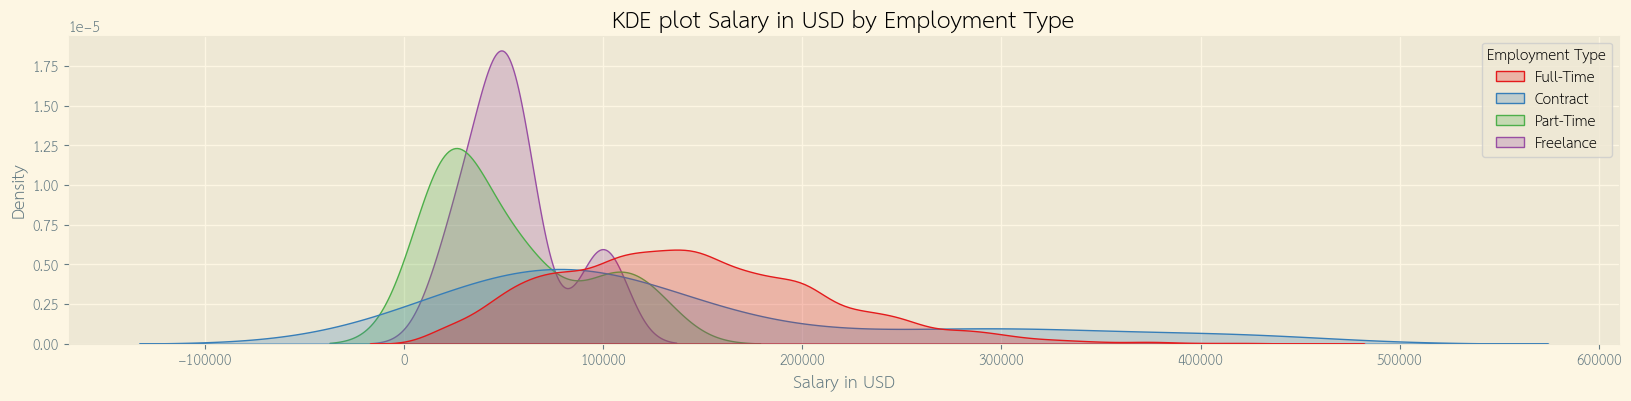

In [ ]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='Salary in USD', hue='Employment Type', common_norm=False, fill=True, palette='Set1')
plt.title('KDE plot Salary in USD by Employment Type')
plt.xlabel('Salary in USD')

plt.show()

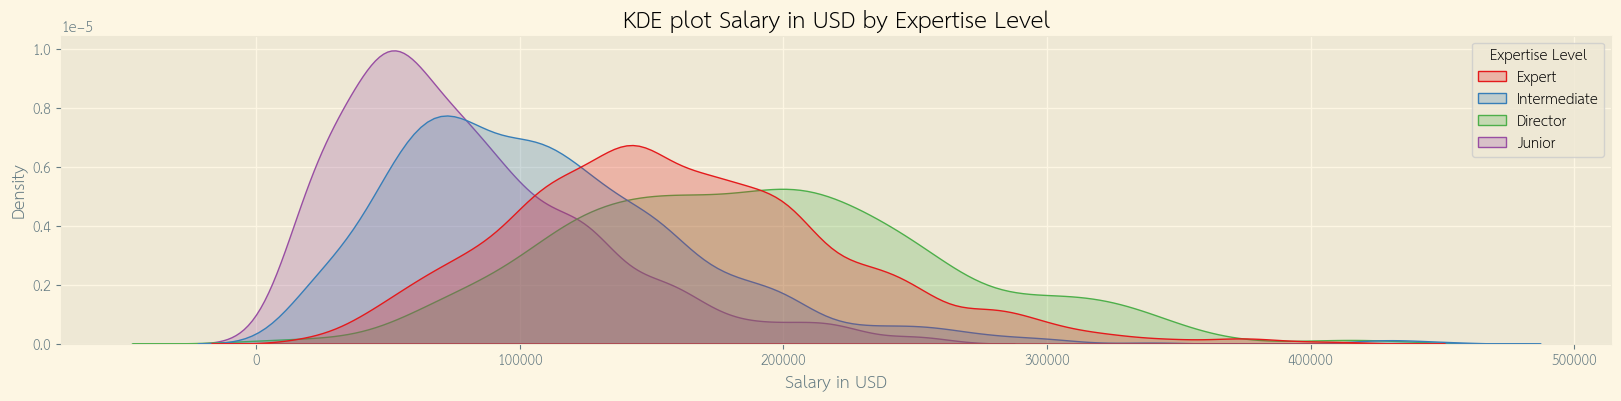

In [ ]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='Salary in USD', hue='Expertise Level', common_norm=False, fill=True, palette='Set1')
plt.title('KDE plot Salary in USD by Expertise Level')
plt.xlabel('Salary in USD')

plt.show()

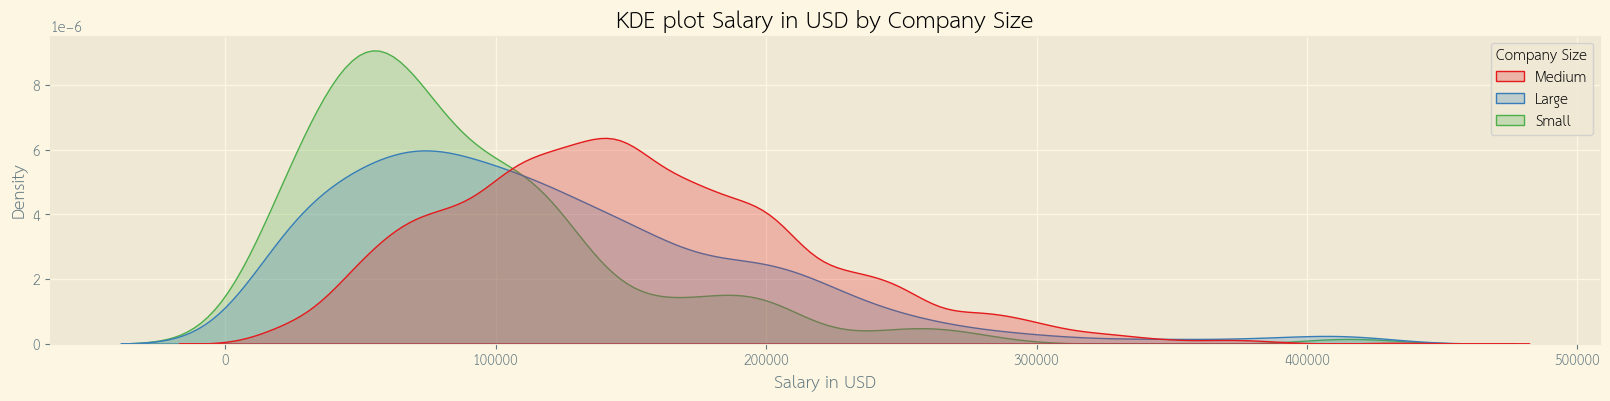

In [ ]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='Salary in USD', hue='Company Size', common_norm=False, fill=True, palette='Set1')
plt.title('KDE plot Salary in USD by Company Size')
plt.xlabel('Salary in USD')

plt.show()

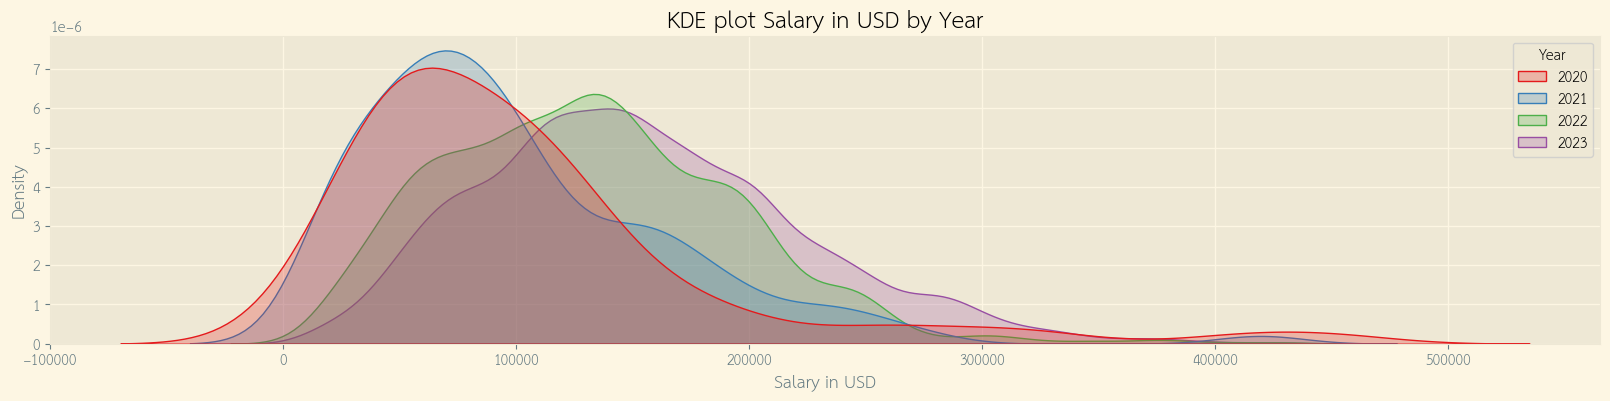

In [ ]:
plt.figure(figsize=(20,4))
sns.kdeplot(data=df, x='Salary in USD', hue='Year', common_norm=False, fill=True, palette='Set1')
plt.title('KDE plot Salary in USD by Year')
plt.xlabel('Salary in USD')

plt.show()

# Modelling processing

## Import library for modelling

In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

## Linear Regression


### Import data

In [ ]:
linear_data1 = pd.read_csv('Latest_Data_Science_Salaries.csv')
linear_data2 = pd.read_csv("v2_Latest_Data_Science_Salaries.csv")
linear_data3 = pd.read_csv("v3_Latest_Data_Science_Salaries.csv")
linear_data4 = pd.read_csv("v4_Latest_Data_Science_Salaries.csv")
Frames = [linear_data1, linear_data2, linear_data3, linear_data4]
linear_data = pd.concat(Frames, ignore_index=True)

### Preparation data & Encoding

In [ ]:
linear_copy_data = linear_data.copy()
linear_copy_data = linear_copy_data.drop(['Expertise Level','Salary','Salary Currency'], axis=1)

X, y = linear_copy_data.drop(['Salary in USD'], axis=1), linear_copy_data['Salary in USD']

In [ ]:
# encoding train data
X_copy = X.copy()
order = [['Entry','Mid','Senior','Executive'],
         ['Small','Medium','Large']]

# ordinal encoding
ode = OrdinalEncoder(categories=order)
X_copy[['Experience Level','Company Size']] = ode.fit_transform(X_copy[['Experience Level','Company Size']])
print(f'Ordinal encoding')
display(X_copy.head(5))

# nominal encoding
col = ['Job Title','Employment Type','Company Location','Employee Residence']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encode_feat = pd.DataFrame(ohe.fit_transform(X_copy[col]), columns=ohe.get_feature_names_out(col))
encode_feat.index = X_copy.index
X_copy = X_copy.drop(col, axis=1)
X_copy = pd.concat([X_copy, encode_feat], axis=1)
print(f'\nNominal encoding')
display(X_copy.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.1, random_state=123)

Ordinal encoding


,Job Title,Employment Type,Experience Level,Company Location,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
1,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
2,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
3,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
4,Data Scientist,Full-Time,2.0,United States,United States,1.0,2023



Nominal encoding


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Experience Level,Company Size,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Engineer,Job Title_AI Programmer,Job Title_AI Research Engineer,Job Title_AI Scientist,Job Title_AWS Data Architect,...,Employee Residence_Switzerland,Employee Residence_Thailand,Employee Residence_Tunisia,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam
0,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Define model & predict

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = linear_model.predict(X_train)

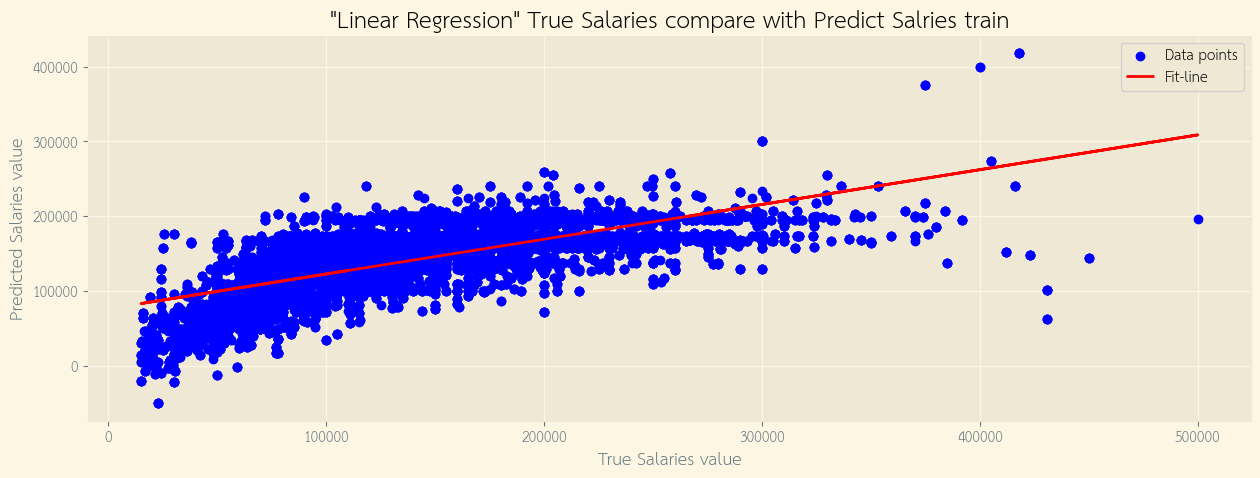

In [ ]:
slope, intercept = np.polyfit(y_train, y_pred_train, 1)
fit_line = slope * y_train + intercept

plt.figure(figsize=(15,5))
plt.scatter(x=y_train, y=y_pred_train, color='b', label='Data points')
plt.plot(y_train, fit_line, color='r', label='Fit-line')
plt.title('\"Linear Regression\" True Salaries compare with Predict Salries train')
plt.xlabel('True Salaries value')
plt.ylabel('Predicted Salaries value')
plt.legend()
plt.show()

In [ ]:
print(f'Mean absolute error = {mean_absolute_error(y_train, y_pred_train)}')
print(f'R2_score = {r2_score(y_train, y_pred_train)}')

Mean absolute error = 37776.40181688353
R2_score = 0.46494556999722547


In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
linear_true_salary = y_test
y_pred_linear_model = y_pred

predictions = pd.DataFrame({'Real Salary': linear_true_salary, 'Predict Salary': y_pred_linear_model})
predictions.sample(10)

,Real Salary,Predict Salary
9535,88100,165168.5
11263,80000,166517.5
7317,212000,137896.5
10517,189000,198543.5
11780,116000,137896.5
6195,216200,129168.5
12501,209300,173896.5
3903,76000,137926.5
5196,72200,91320.5
2590,218000,165168.5


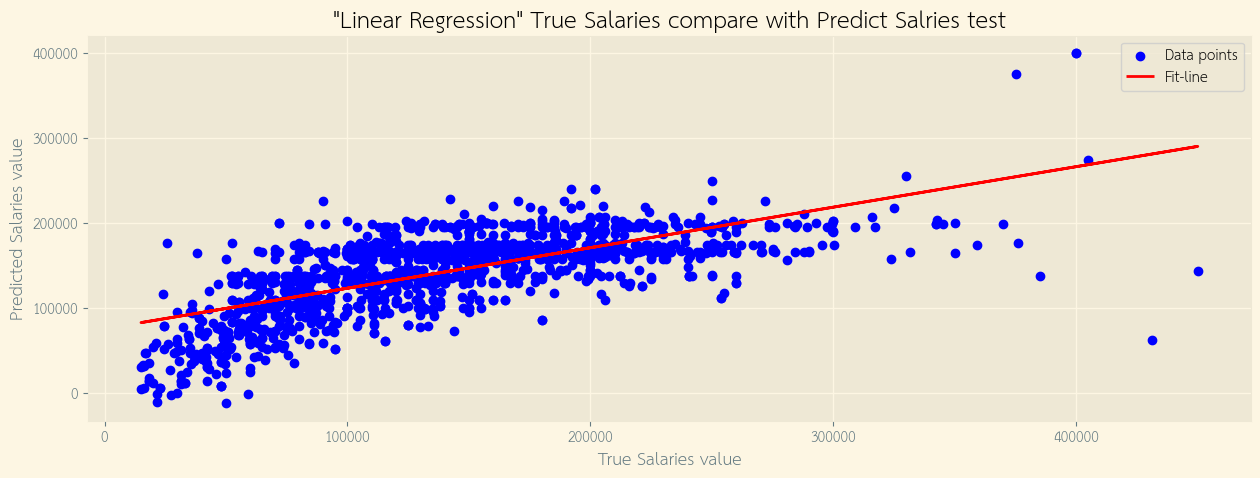

In [ ]:
slope, intercept = np.polyfit(linear_true_salary, y_pred_linear_model, 1)
fit_line = slope * linear_true_salary + intercept

plt.figure(figsize=(15,5))
plt.scatter(x=linear_true_salary, y=y_pred_linear_model, color='b', label='Data points')
plt.plot(linear_true_salary, fit_line, color='r', label='Fit-line')
plt.title('\"Linear Regression\" True Salaries compare with Predict Salries test')
plt.xlabel('True Salaries value')
plt.ylabel('Predicted Salaries value')
plt.legend()
plt.show()

In [ ]:
print(f'Mean absolute error = {mean_absolute_error(y_test, y_pred)}')
print(f'R2_score = {r2_score(y_test, y_pred)}')

Mean absolute error = 37816.59992862241
R2_score = 0.46685114578985565


## Random forest Regression

### Import data

In [ ]:
forest_data1 = pd.read_csv('Latest_Data_Science_Salaries.csv')
forest_data2 = pd.read_csv("v2_Latest_Data_Science_Salaries.csv")
forest_data3 = pd.read_csv("v3_Latest_Data_Science_Salaries.csv")
forest_data4 = pd.read_csv("v4_Latest_Data_Science_Salaries.csv")
Frames = [forest_data1, forest_data2, forest_data3, forest_data4]
forest_data = pd.concat(Frames, ignore_index=True)

### Preparetion data & Encoding

In [ ]:
forest_copy_data = forest_data.copy()
forest_copy_data = forest_copy_data.drop(['Expertise Level','Salary','Salary Currency'], axis=1)

X, y = forest_copy_data.drop(['Salary in USD'], axis=1), forest_copy_data['Salary in USD']

In [ ]:
# encoding train data (for train model)
X_copy = X.copy()
order = [['Entry','Mid','Senior','Executive'],
         ['Small','Medium','Large']]

# ordinal encoding
ode = OrdinalEncoder(categories=order)
X_copy[['Experience Level','Company Size']] = ode.fit_transform(X_copy[['Experience Level','Company Size']])
print(f'Ordinal encoding')
display(X_copy.head(5))

# nominal encoding
col = ['Job Title','Employment Type','Company Location','Employee Residence']
encode_feat = pd.DataFrame(ohe.fit_transform(X_copy[col]), columns=ohe.get_feature_names_out(col))
encode_feat.index = X_copy.index
X_copy = X_copy.drop(col, axis=1)
X_copy = pd.concat([X_copy, encode_feat], axis=1)
print(f'\nNominal encoding')
display(X_copy.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.1, random_state=123)

Ordinal encoding


,Job Title,Employment Type,Experience Level,Company Location,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
1,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
2,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
3,Data Engineer,Full-Time,2.0,United States,United States,1.0,2023
4,Data Scientist,Full-Time,2.0,United States,United States,1.0,2023



Nominal encoding


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Experience Level,Company Size,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Engineer,Job Title_AI Programmer,Job Title_AI Research Engineer,Job Title_AI Scientist,Job Title_AWS Data Architect,...,Employee Residence_Switzerland,Employee Residence_Thailand,Employee Residence_Tunisia,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam
0,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Define model & predict

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred_forest_train = rf_reg.predict(X_train)

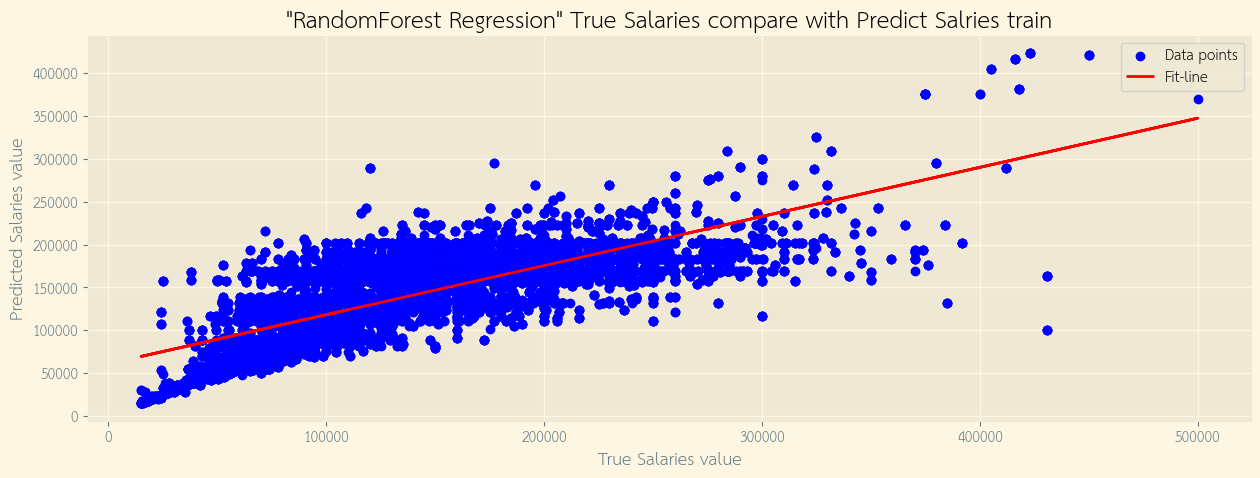

In [ ]:
slope, intercept = np.polyfit(y_train, y_pred_forest_train, 1)
fit_line = slope * y_train + intercept

plt.figure(figsize=(15,5))
plt.scatter(x=y_train, y=y_pred_forest_train, color='b', label='Data points')
plt.plot(y_train, fit_line, color='r', label='Fit-line')
plt.title('\"RandomForest Regression\" True Salaries compare with Predict Salries train')
plt.xlabel('True Salaries value')
plt.ylabel('Predicted Salaries value')
plt.legend()
plt.show()

In [ ]:
print('Mean Absolute Error = ',mean_absolute_error(y_train,y_pred_forest_train))
print('R2 score = ',r2_score(y_train,y_pred_forest_train))

Mean Absolute Error =  31641.57494987664
R2 score =  0.5747841567634202


In [ ]:
y_pred_forest = rf_reg.predict(X_test)

In [ ]:
forest_true_salary = y_test
y_pred_forest_model = y_pred_forest

predictions = pd.DataFrame({'Real Salary': forest_true_salary, 'Predict Salary': y_pred_forest_model})
predictions.sample(10).round(2)

,Real Salary,Predict Salary
13289,236900,161889.31
12930,165000,158583.73
12047,116450,163785.74
1062,204500,146232.92
5865,33000,35414.70
4151,47899,49393.10
12217,134000,129434.13
11623,149040,168811.73
8193,55000,131507.69
12315,80000,80000.00


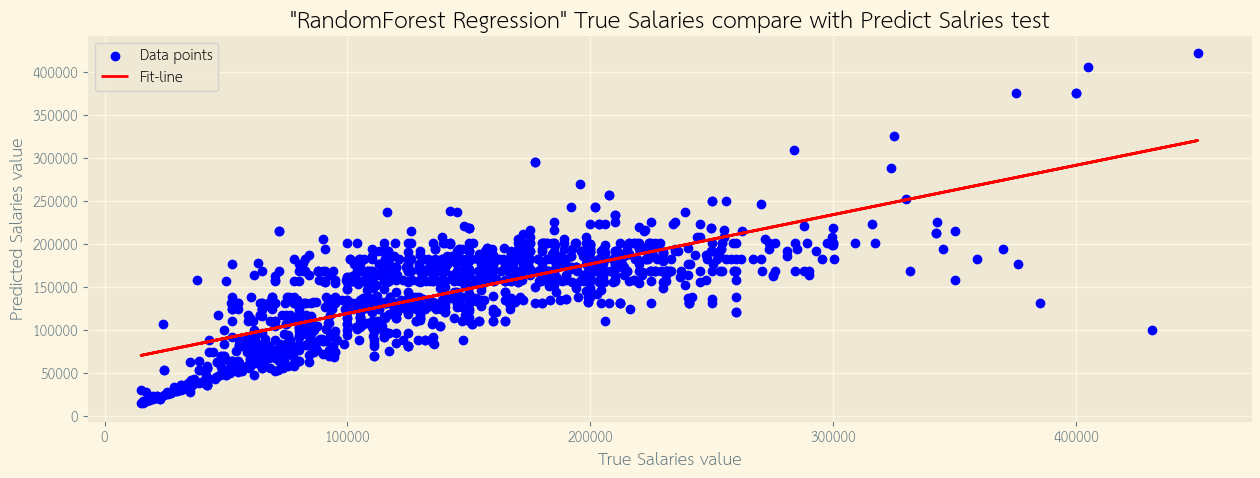

In [ ]:
slope, intercept = np.polyfit(forest_true_salary, y_pred_forest_model, 1)
fit_line = slope * forest_true_salary + intercept

plt.figure(figsize=(15,5))
plt.scatter(x=forest_true_salary, y=y_pred_forest_model, color='b', label='Data points')
plt.plot(forest_true_salary, fit_line, color='r', label='Fit-line')
plt.title('\"RandomForest Regression\" True Salaries compare with Predict Salries test')
plt.xlabel('True Salaries value')
plt.ylabel('Predicted Salaries value')
plt.legend()
plt.show()

In [ ]:
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred_forest))
print('R2 score = ',r2_score(y_test,y_pred_forest))

Mean Absolute Error =  32608.65068758522
R2 score =  0.5596636608823837
